In [1]:
import pandas as pd

# Load the dataset
file_path = 'combined_articles_control.csv'
data = pd.read_csv(file_path)

# Convert the Timestamp column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Sort the data by Article ID and Timestamp
data = data.sort_values(by=['Article ID', 'Timestamp'])

# Initialize a dictionary to store edges and weights
edges = {}

base_time = 0
base_revision_times = []
prev_row = None

for index, row in data.iterrows():
    if prev_row is not None:
        time_diff = (row['Timestamp'] - prev_row['Timestamp']).total_seconds()
        base_revision_times.append(time_diff)
    if len(base_revision_times) > 0:
        base_time = sum(base_revision_times) / len(base_revision_times)
    
    prev_row = row

# Define a time limit for considering revisions as disagreements (in seconds)
time_limit = base_time  # 1 hour

# Iterate through the articles
for article_id, article_data in data.groupby('Article ID'):
    # Initialize the previous row
    prev_row = None
    
    # Iterate through the revisions of the article
    for index, row in article_data.iterrows():
        # If there is a previous row
        if prev_row is not None:
            # Check if the current user is different from the previous user
            if row['User/IP'] != prev_row['User/IP']:
                # Calculate the time difference in seconds
                time_diff = (row['Timestamp'] - prev_row['Timestamp']).total_seconds()
                
                # Calculate the weight based on the time difference
                weight = max(0, -time_diff / time_limit + 1)
                
                # Create an edge tuple
                edge = (prev_row['User/IP'], row['User/IP'])
                
                # Add or update the edge in the dictionary
                if edge in edges:
                    edges[edge] += weight
                else:
                    edges[edge] = weight
        
        # Update the previous row
        prev_row = row

# Initialize a dictionary to store total weights by article
total_weights_by_article = {}

# Iterate through the articles again to calculate total weights
for article_id, article_data in data.groupby('Article ID'):
    total_weight = 0
    prev_row = None

    revision_times = []
    time_limit = 3600
    #calculate average time between revisions
    for index, row in article_data.iterrows():
        if prev_row is not None:
            time_diff = (row['Timestamp'] - prev_row['Timestamp']).total_seconds()
            revision_times.append(time_diff)
        prev_row = row
    if len(revision_times) > 0:
        time_limit = sum(revision_times) / len(revision_times)
    
    for index, row in article_data.iterrows():
        if prev_row is not None and row['User/IP'] != prev_row['User/IP']:
            time_diff = (row['Timestamp'] - prev_row['Timestamp']).total_seconds()
            weight = max(0, -time_diff / time_limit + 1)
            total_weight += weight
        
        prev_row = row
    
    total_weights_by_article[article_id] = total_weight

# Convert the dictionary to a DataFrame for better readability
total_weights_df = pd.DataFrame(list(total_weights_by_article.items()), columns=['Article ID', 'Total Weight'])

# Display the DataFrame
total_weights_df.head()

#add article title to total_weights_df
article_titles = data[['Article ID', 'Article Title']].drop_duplicates()
total_weights_df = total_weights_df.merge(article_titles, on='Article ID')



In [2]:
total_weights_df

,Article ID,Total Weight,Article Title
0,1115048,57.797830,Sultan Saeed
1,3812605,91.223186,Jennifer Latheef
2,3930858,51.939666,Fathimath Shafeega
3,4229406,85.345396,Naushad Waheed
4,4376698,408.858724,Hassan Ugail
5,4430333,201.996146,Imad Latheef
6,7002909,178.136763,Mohamed Zahir
7,7169832,319.313068,Moosa Ali Jaleel
8,16223943,158.849975,Abdulla Shamaal
9,24777756,143.039970,Ilyas Hussain Ibrahim


In [10]:
#calculate average total weight for the entire dataset
total_weights_df['Total Weight'].mean()

85.17250359837763

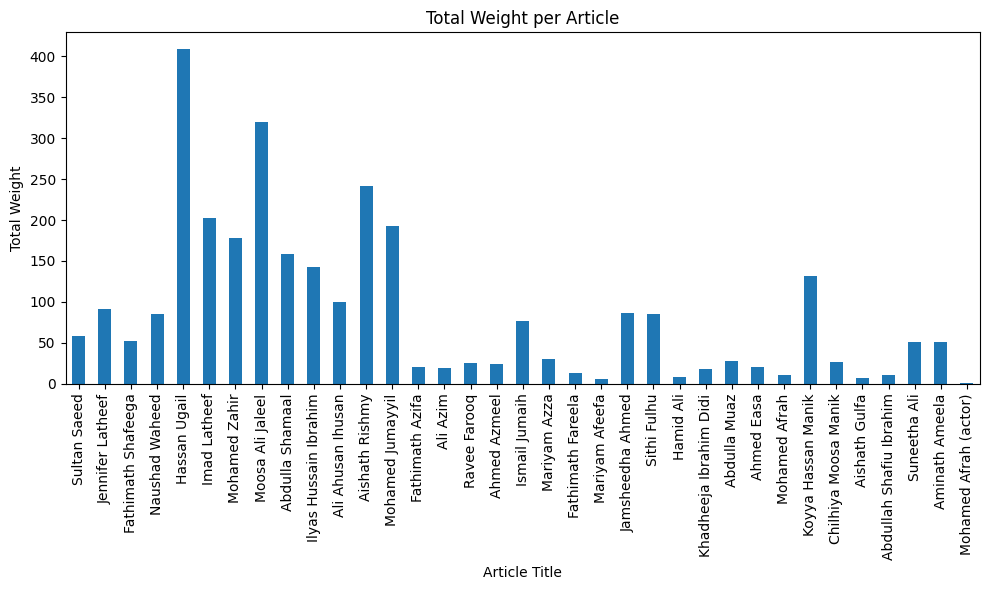

In [3]:
import matplotlib.pyplot as plt

# Assuming total_weights_df is a DataFrame with 'Article Title' and 'Total Weight' as its columns
plt.figure(figsize=(10,6))
total_weights_df.set_index('Article Title')['Total Weight'].plot(kind='bar')
plt.title('Total Weight per Article')
plt.xlabel('Article Title')
plt.ylabel('Total Weight')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visibility
plt.show()

# by time


In [4]:
import pandas as pd

# Load the dataset
file_path = 'combined_articles_control.csv'
data = pd.read_csv(file_path)

# Convert the Timestamp column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract month from Timestamp
data['Month'] = data['Timestamp'].dt.to_period('M')


/var/folders/5z/cnfqktn11n165g1nt0bbmbrh0000gn/T/ipykernel_49247/1825749818.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Month'] = data['Timestamp'].dt.to_period('M')


In [5]:
data

,Article Title,Article ID,User/IP,Timestamp,Revised Text,Month
0,Mohamed Zahir,7002909,Eightzero,2006-09-15 12:32:20+00:00,Major General Mohamed Zahir is the Chief of St...,2006-09
1,Mohamed Zahir,7002909,Skysmith,2006-09-15 13:00:49+00:00,[[Image:mohamedzahir.jpg|right|thumb]]\n\n{{ve...,2006-09
2,Mohamed Zahir,7002909,Eightzero,2006-09-15 13:34:19+00:00,[[Image:mohamedzahir.jpg|right|thumb]]\n\n{{ve...,2006-09
3,Mohamed Zahir,7002909,Eightzero,2006-09-15 13:35:49+00:00,[[Image:mohamedzahir.jpg|right|thumb]]\n\n{{ve...,2006-09
4,Mohamed Zahir,7002909,Eightzero,2006-09-15 13:40:46+00:00,[[Image:mohamedzahir.jpg|right|thumb]]\n\n{{ve...,2006-09
...,...,...,...,...,...,...
3818,Fathimath Azifa,56948037,GreenC bot,2023-08-24 03:46:26+00:00,{{short description|Maldivian film actress|bot...,2023-08
3819,Fathimath Azifa,56948037,202.153.81.54,2023-09-19 11:22:40+00:00,{{short description|Maldivian film actress|bot...,2023-09
3820,Fathimath Azifa,56948037,Atlantic306,2023-09-19 23:19:11+00:00,{{short description|Maldivian film actress|bot...,2023-09
3821,Fathimath Azifa,56948037,ShappeAli,2023-10-21 07:27:22+00:00,{{short description|Maldivian film actress|bot...,2023-10


In [6]:


weights_list = []


# Iterate through the articles
for article_id, article_data in data.groupby(['Article ID', 'Month']):
    prev_row = None
    time_limit = base_time
    revision_times = []

    for index, row in article_data.iterrows():
        if prev_row is not None:
            time_diff = (row['Timestamp'] - prev_row['Timestamp']).total_seconds()
            revision_times.append(time_diff)
        prev_row = row
    if len(revision_times) > 0:
        time_limit = sum(revision_times) / len(revision_times)

    for index, row in article_data.iterrows():
        if prev_row is not None and row['User/IP'] != prev_row['User/IP']:
            time_diff = (row['Timestamp'] - prev_row['Timestamp']).total_seconds()
            weight = max(0, -time_diff / time_limit + 1)
            
            # Append the result to the list
            weights_list.append({'Article ID': article_id, 'Month': row['Month'], 'Weight': weight})
        
        prev_row = row


In [7]:
# Convert the list to a DataFrame
weights_df = pd.DataFrame(weights_list)
# # #seperate article id and month
weights_df[['Article ID', 'Month']] = weights_df['Article ID'].apply(pd.Series)


# Group by Article ID and Month and sum the weights
weights_df = weights_df.groupby(['Article ID', 'Month']).sum().reset_index()


# # #add article title to total_weights_by_month_df
Article_titles = data[['Article ID', 'Article Title']].drop_duplicates()
weights_df = weights_df.merge(article_titles, on='Article ID')

weights_df

,Article ID,Month,Weight,Article Title
0,1115048,2004-11,3.943743,Sultan Saeed
1,1115048,2006-02,3.983299,Sultan Saeed
2,1115048,2008-01,2.000000,Sultan Saeed
3,1115048,2011-12,2.000000,Sultan Saeed
4,3812605,2006-01,5.940413,Jennifer Latheef
...,...,...,...,...
384,61236873,2023-05,4.000000,Abdullah Shafiu Ibrahim
385,65764460,2021-03,0.594440,Suneetha Ali
386,65765203,2021-01,21.119600,Aminath Ameela
387,65765203,2023-08,4.000000,Aminath Ameela


In [8]:
unique_articles = weights_df['Article Title'].unique()


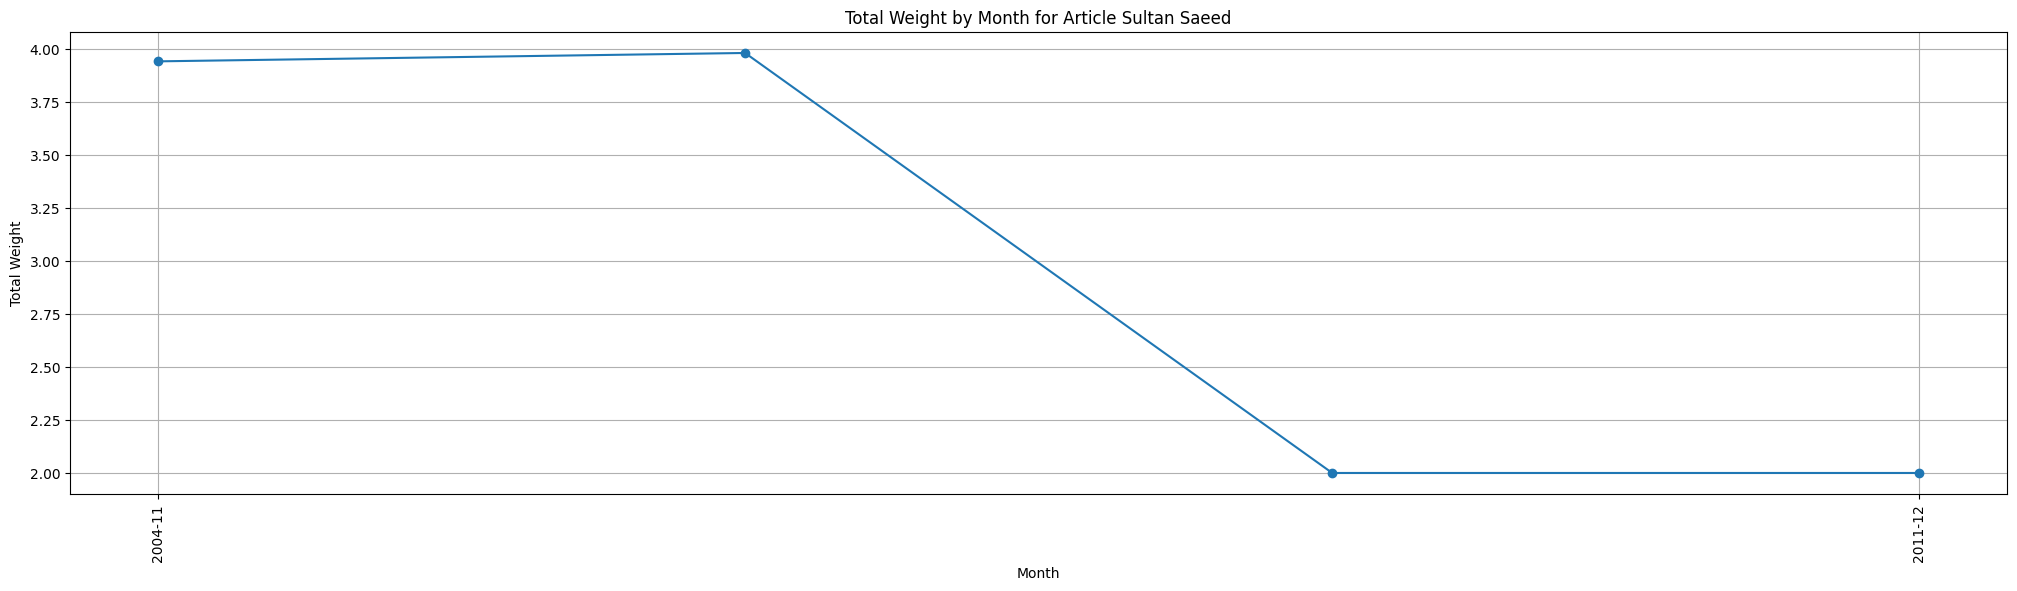

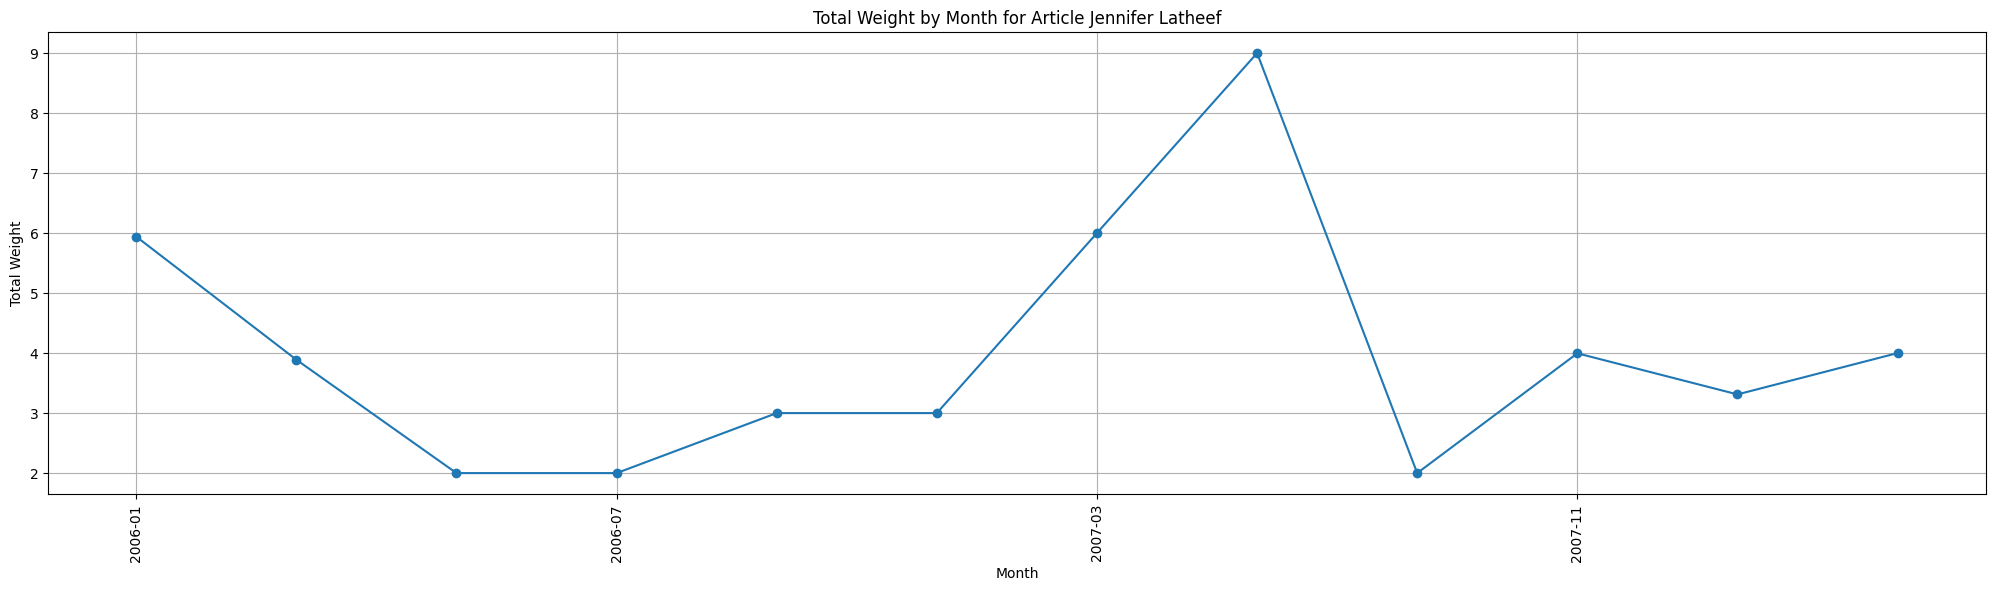

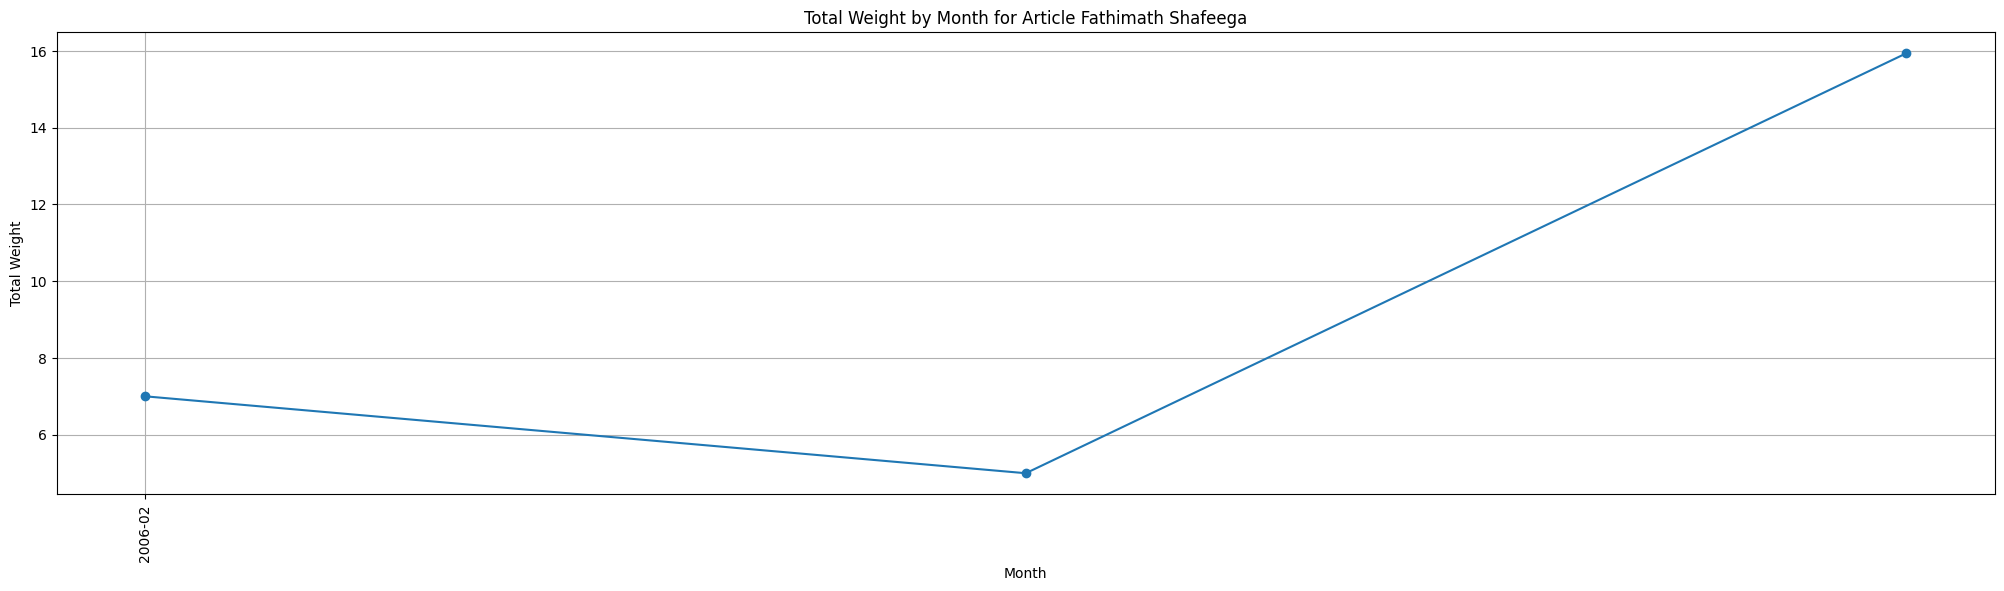

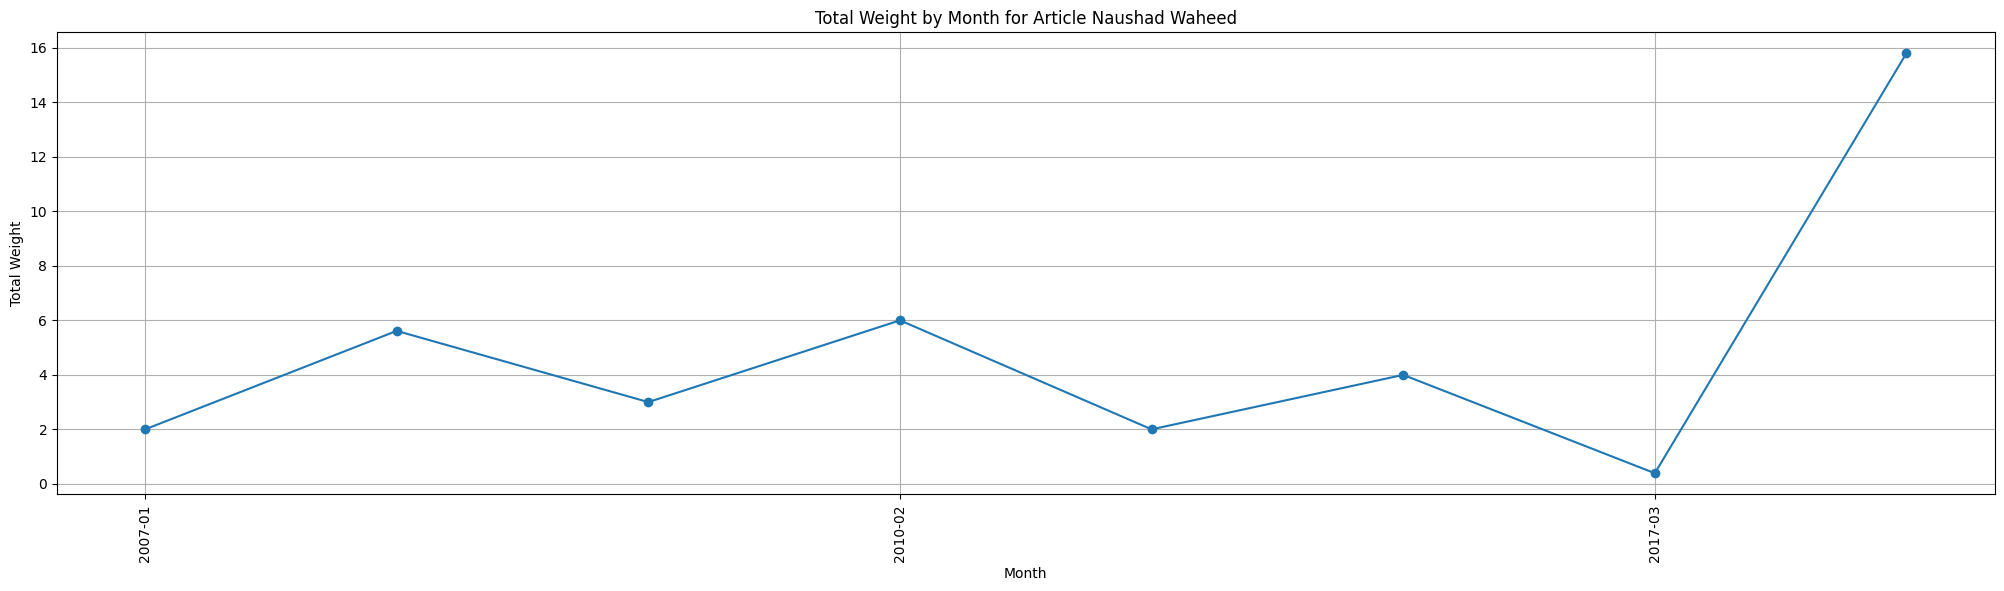

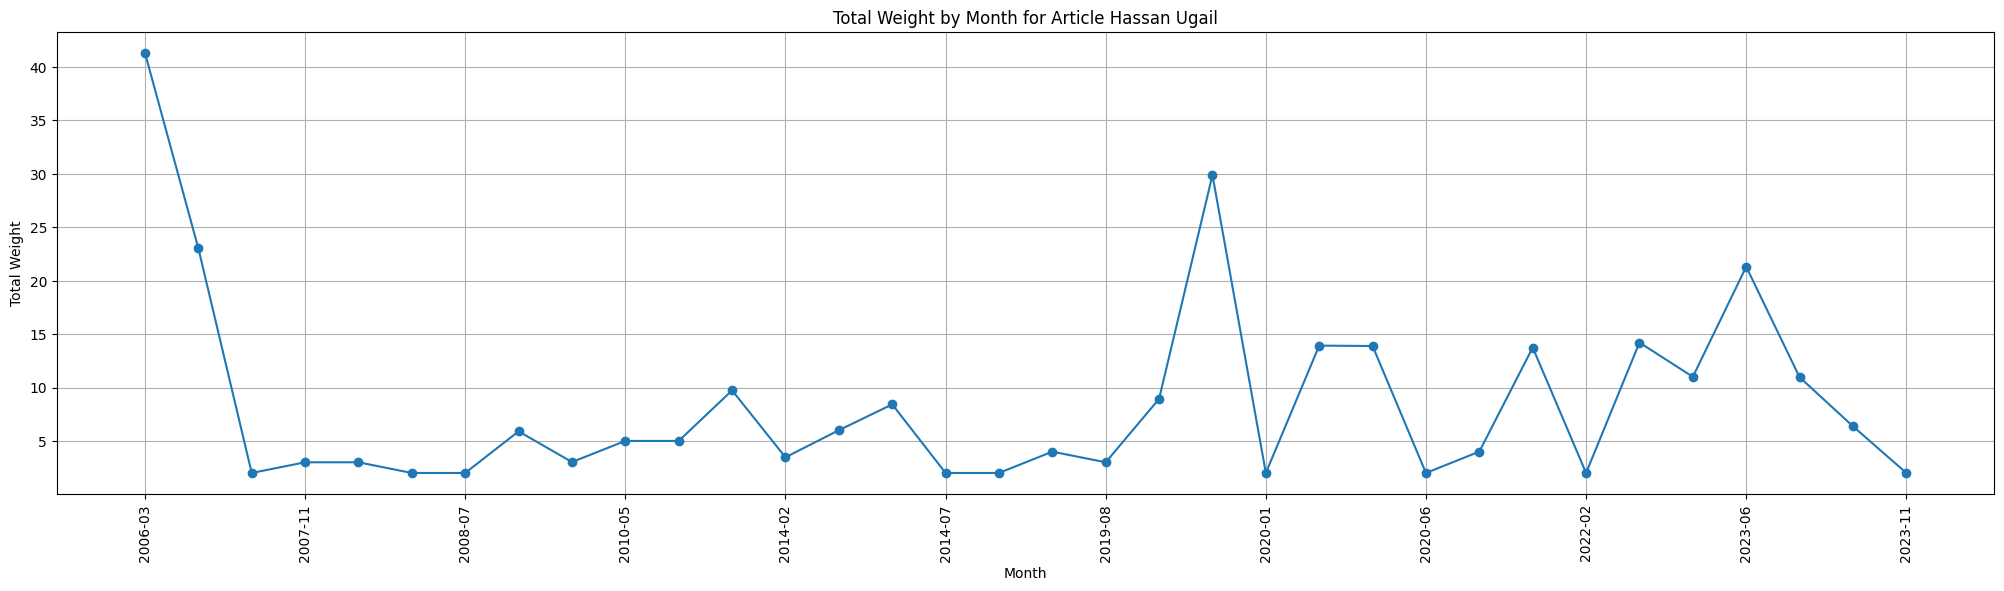

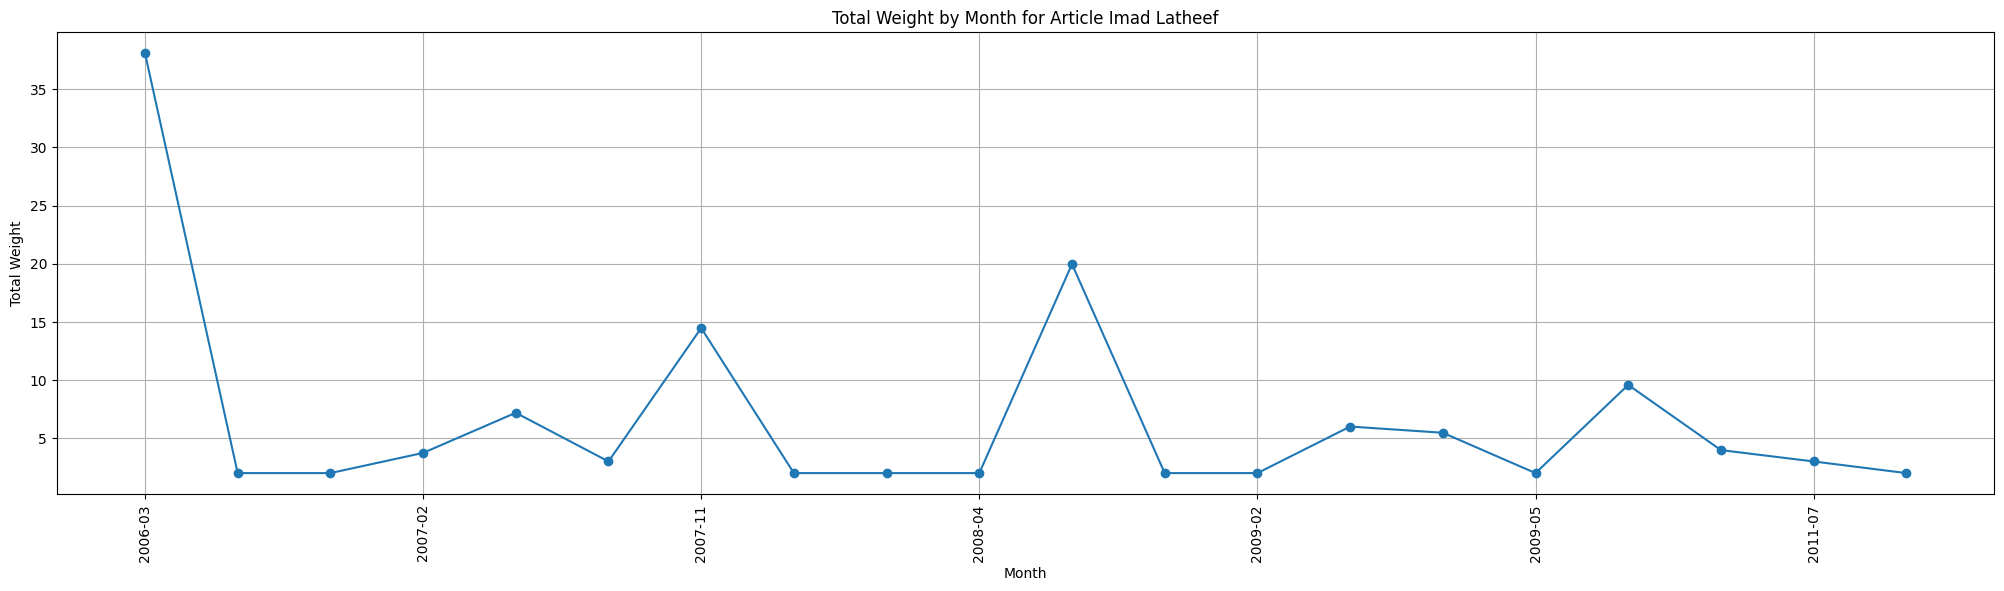

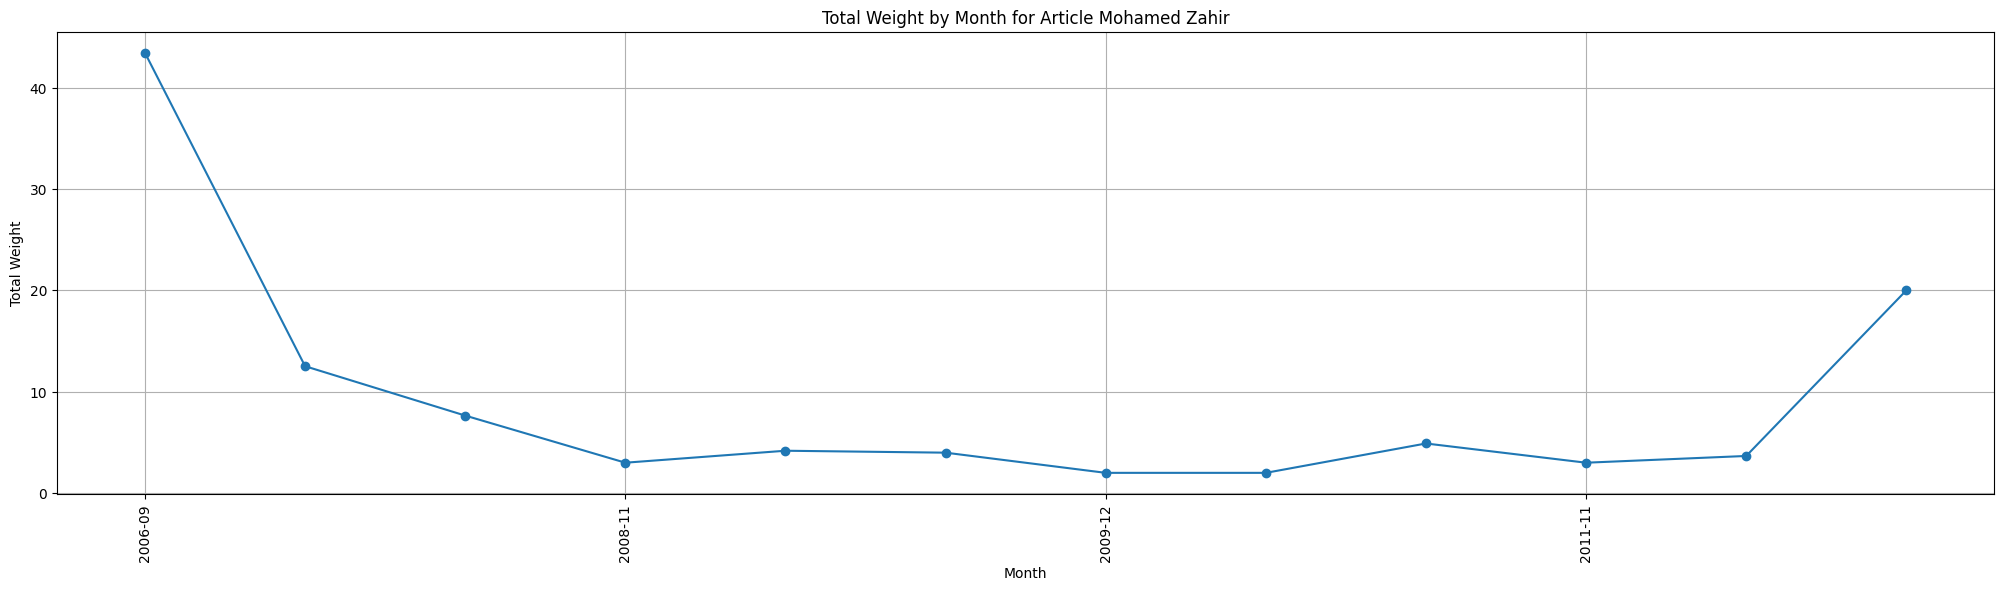

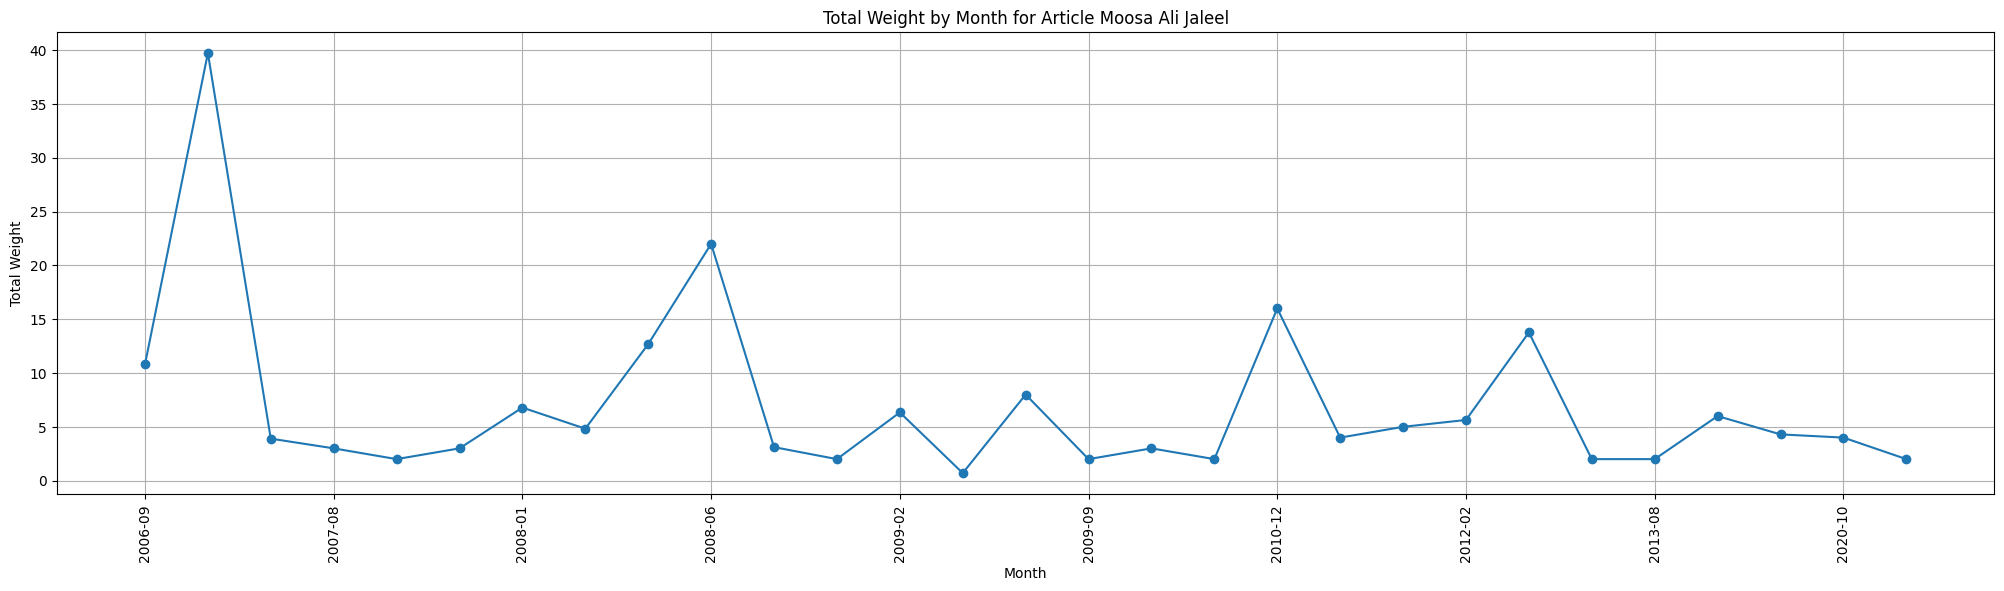

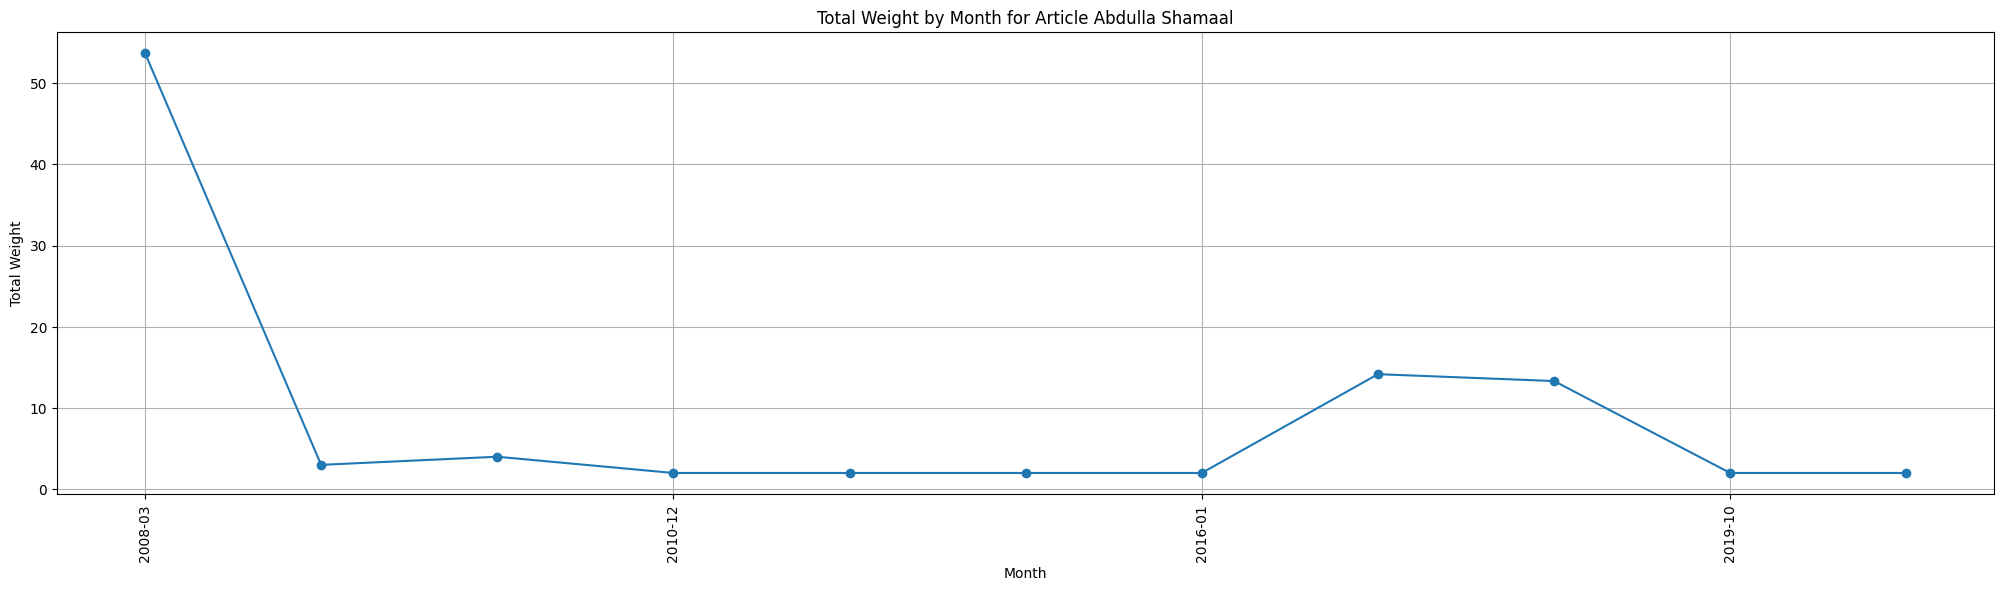

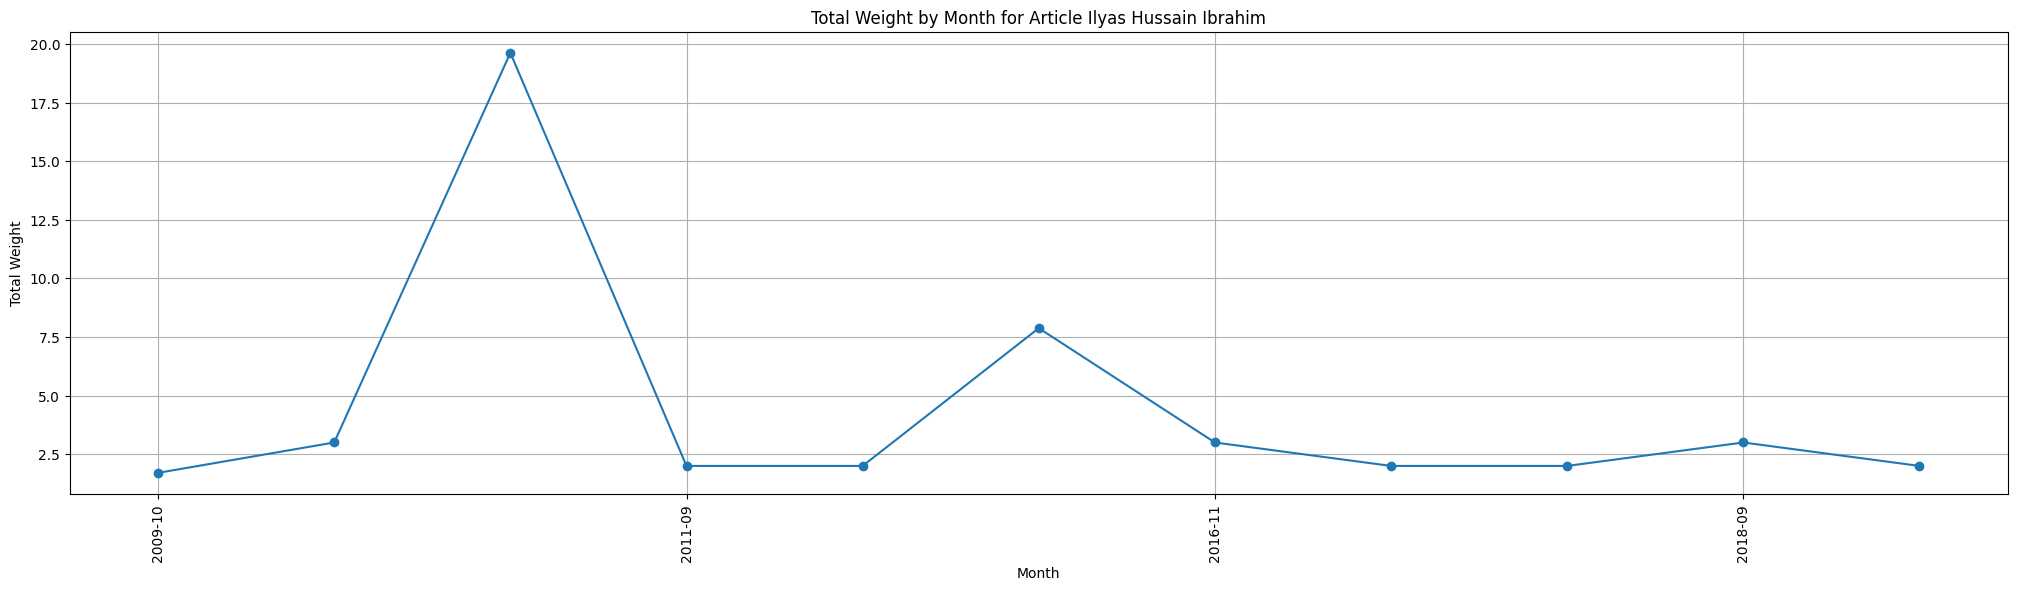

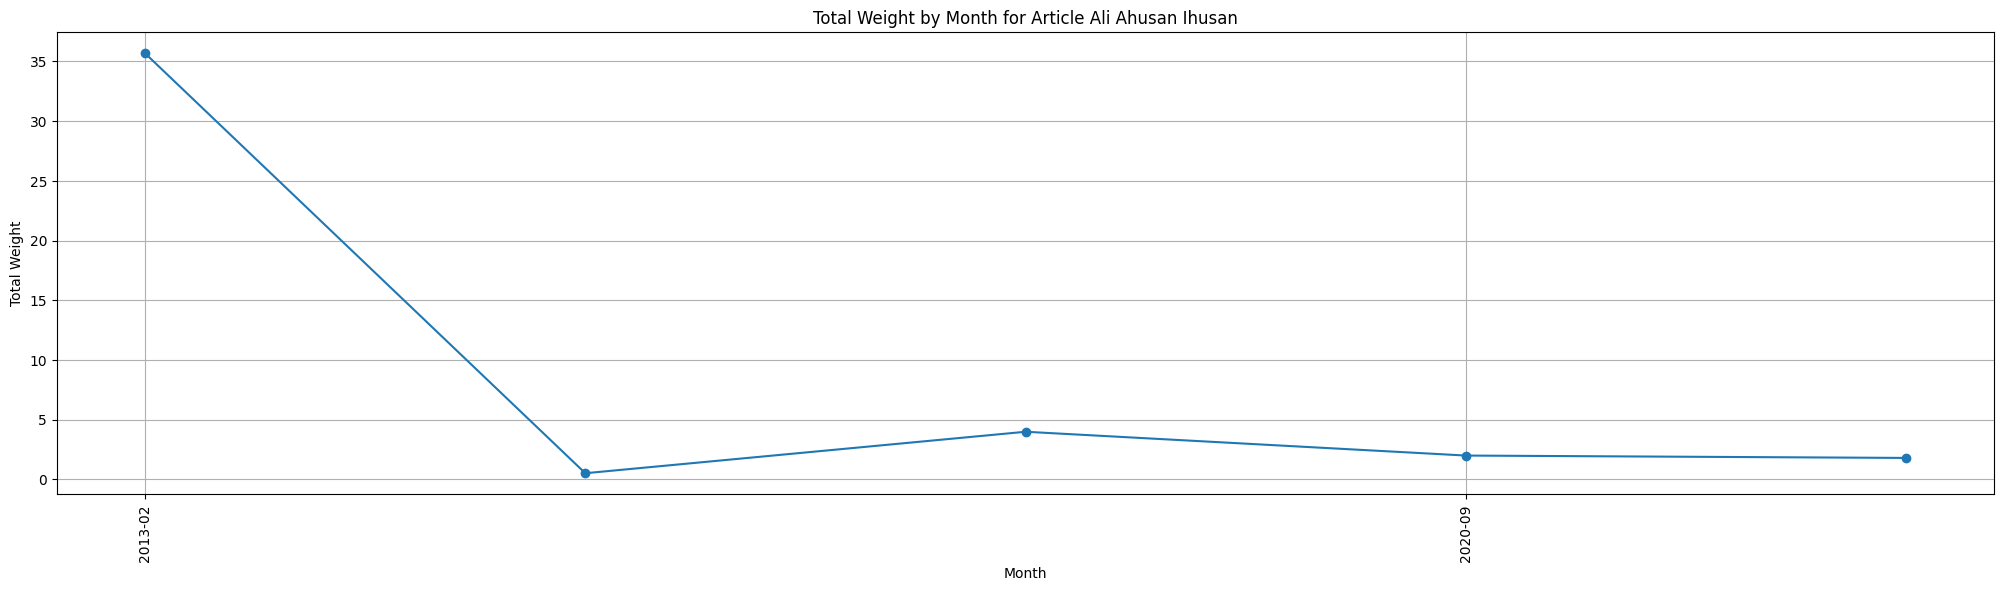

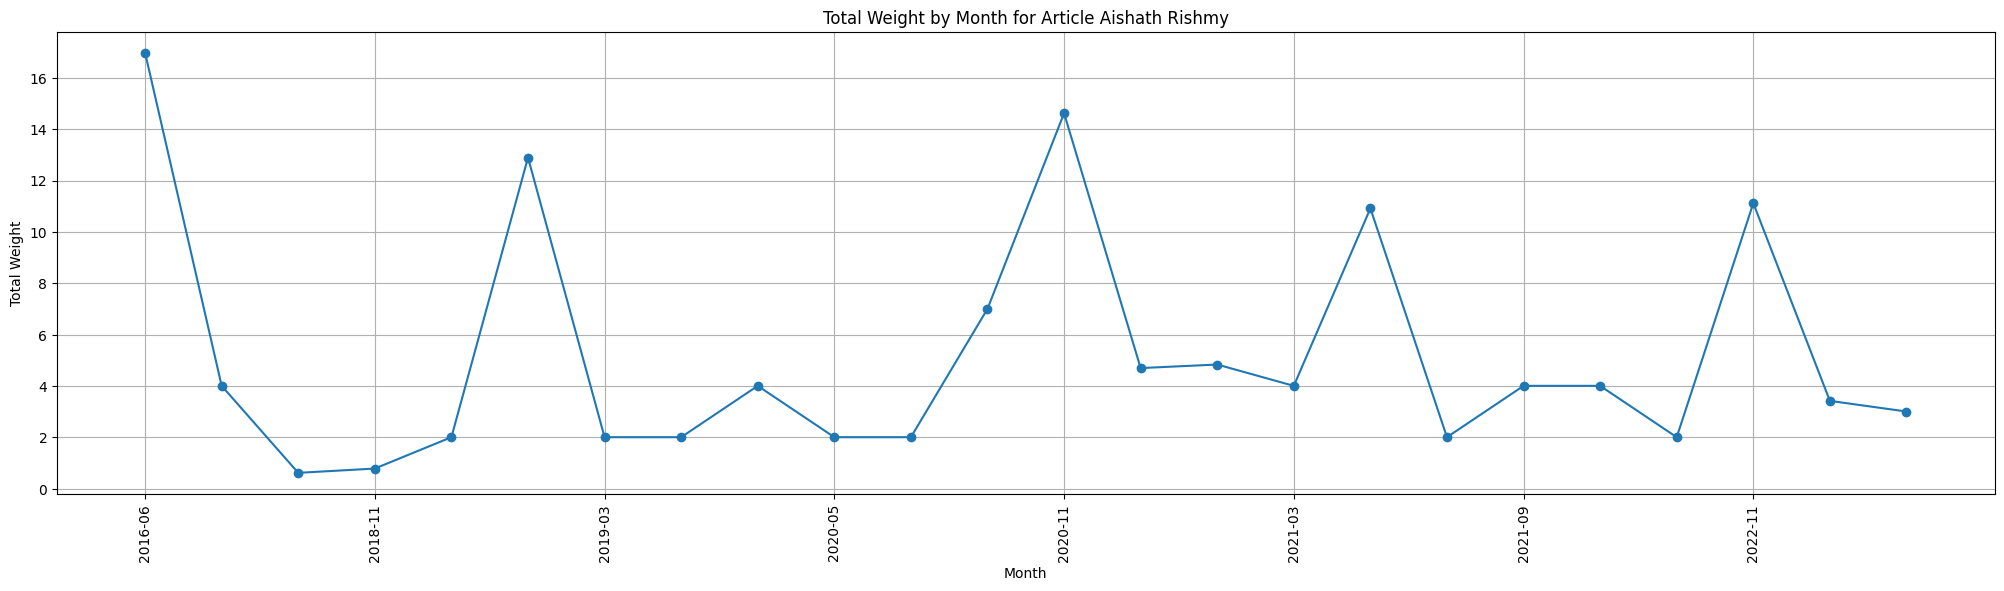

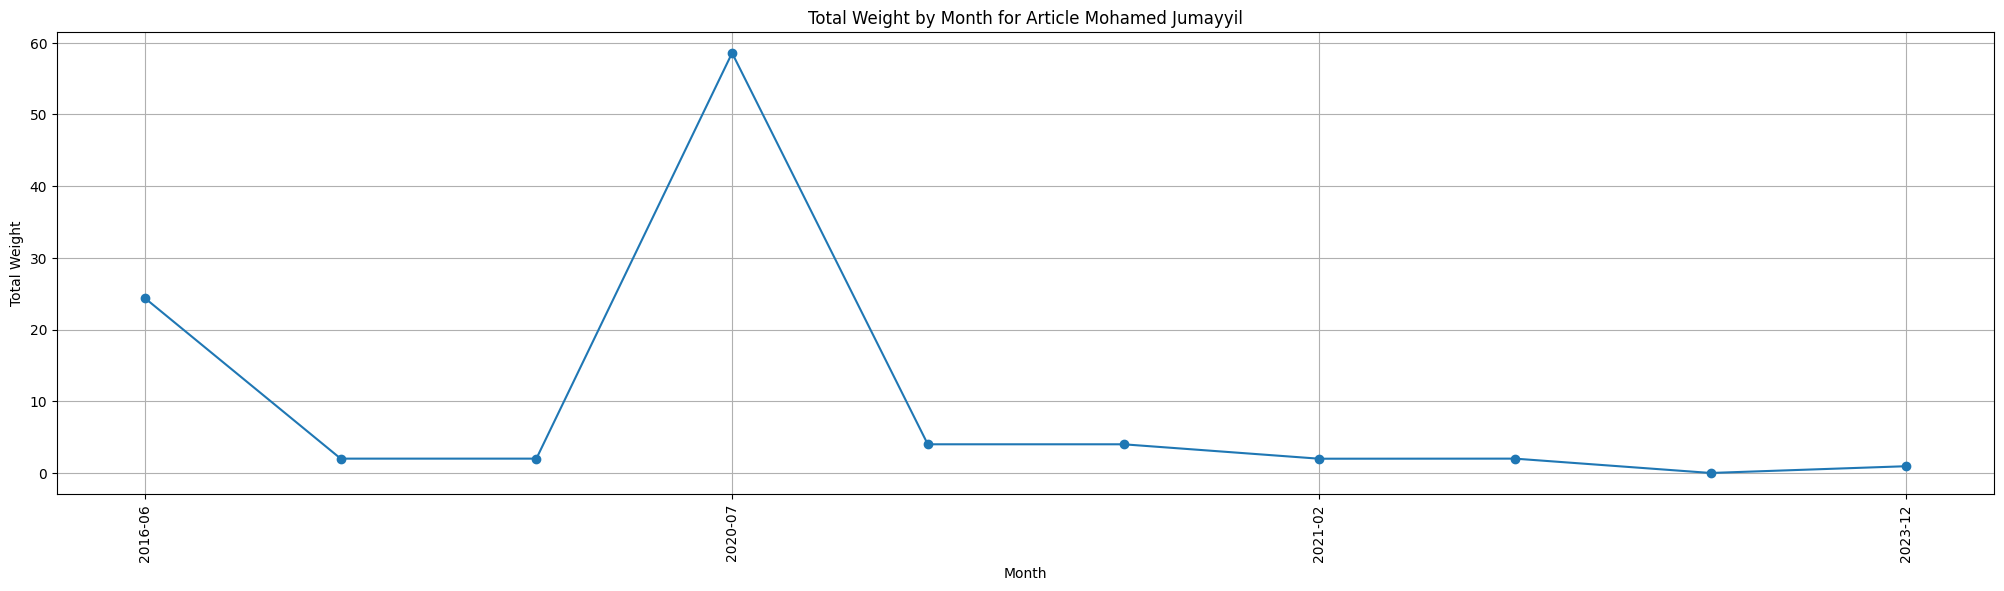

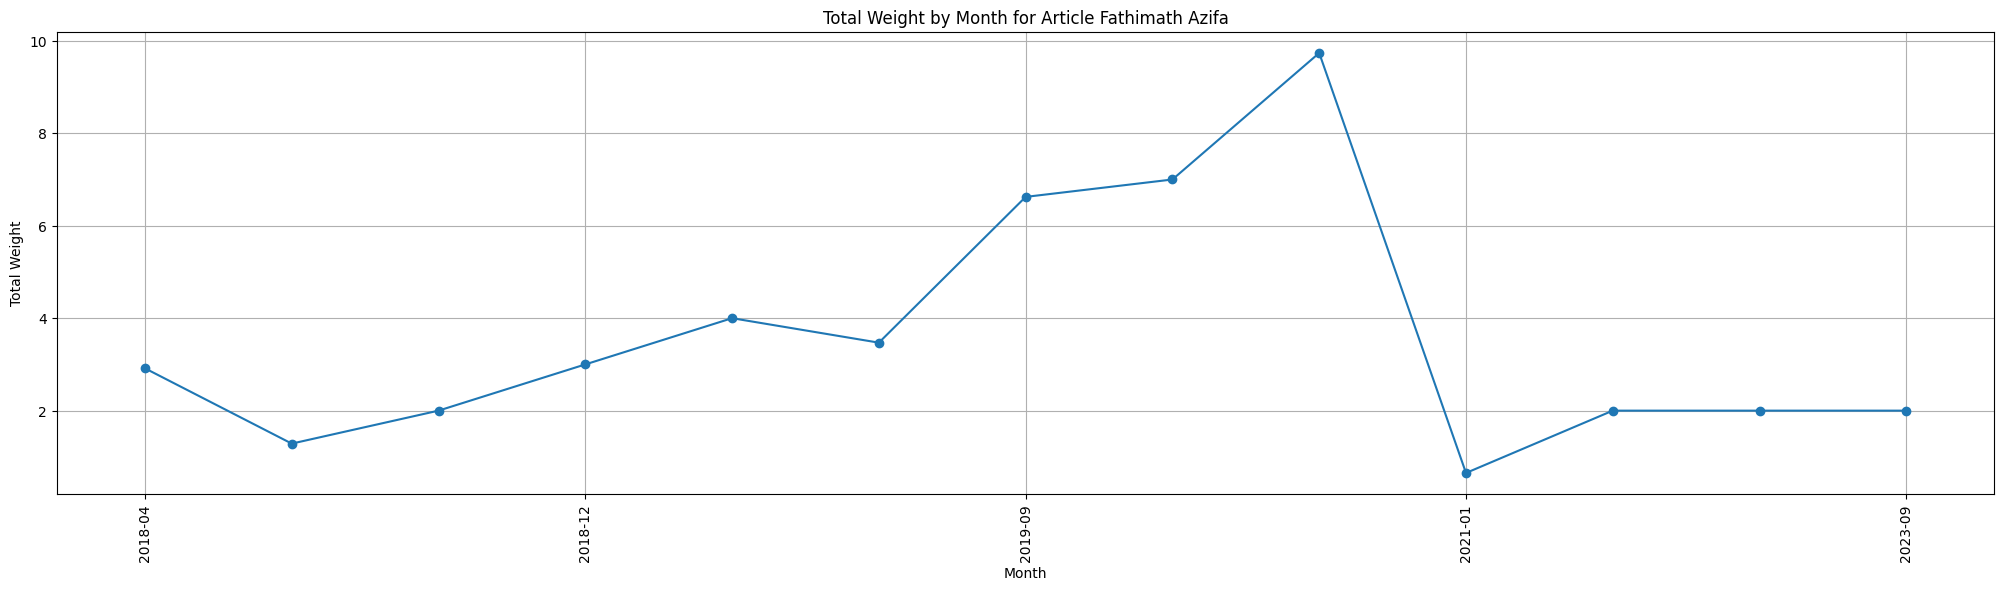

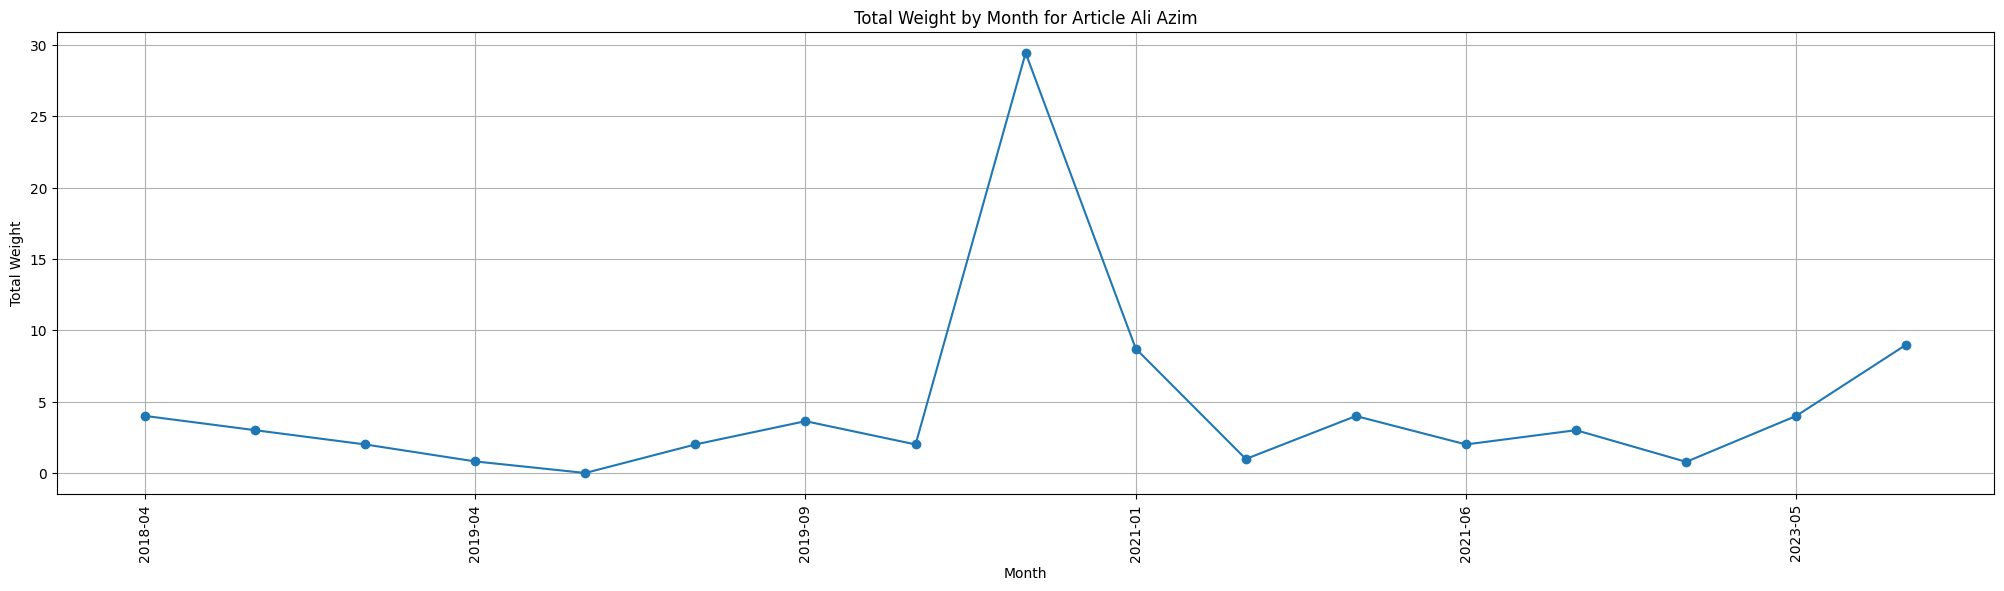

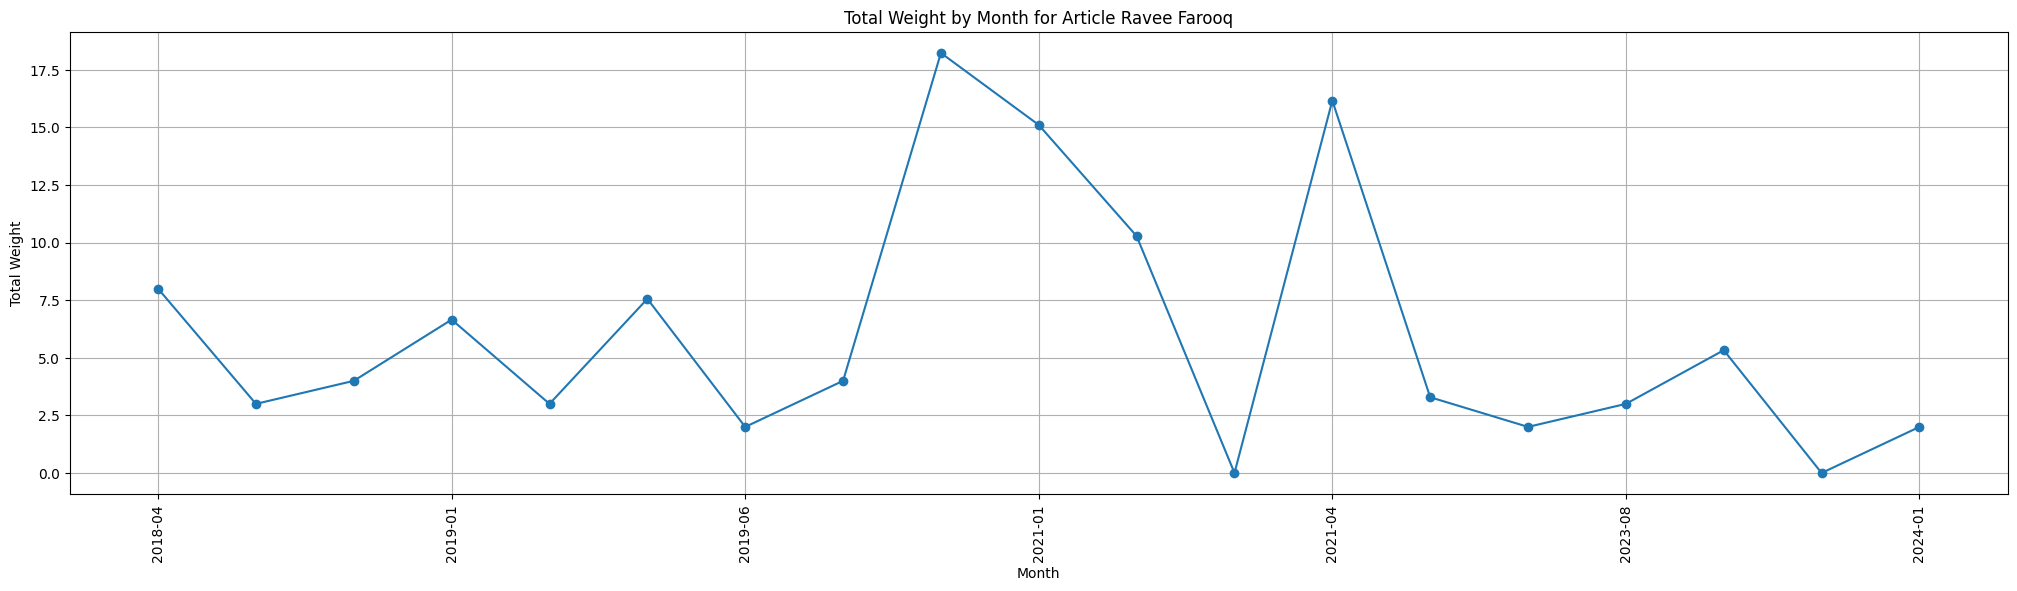

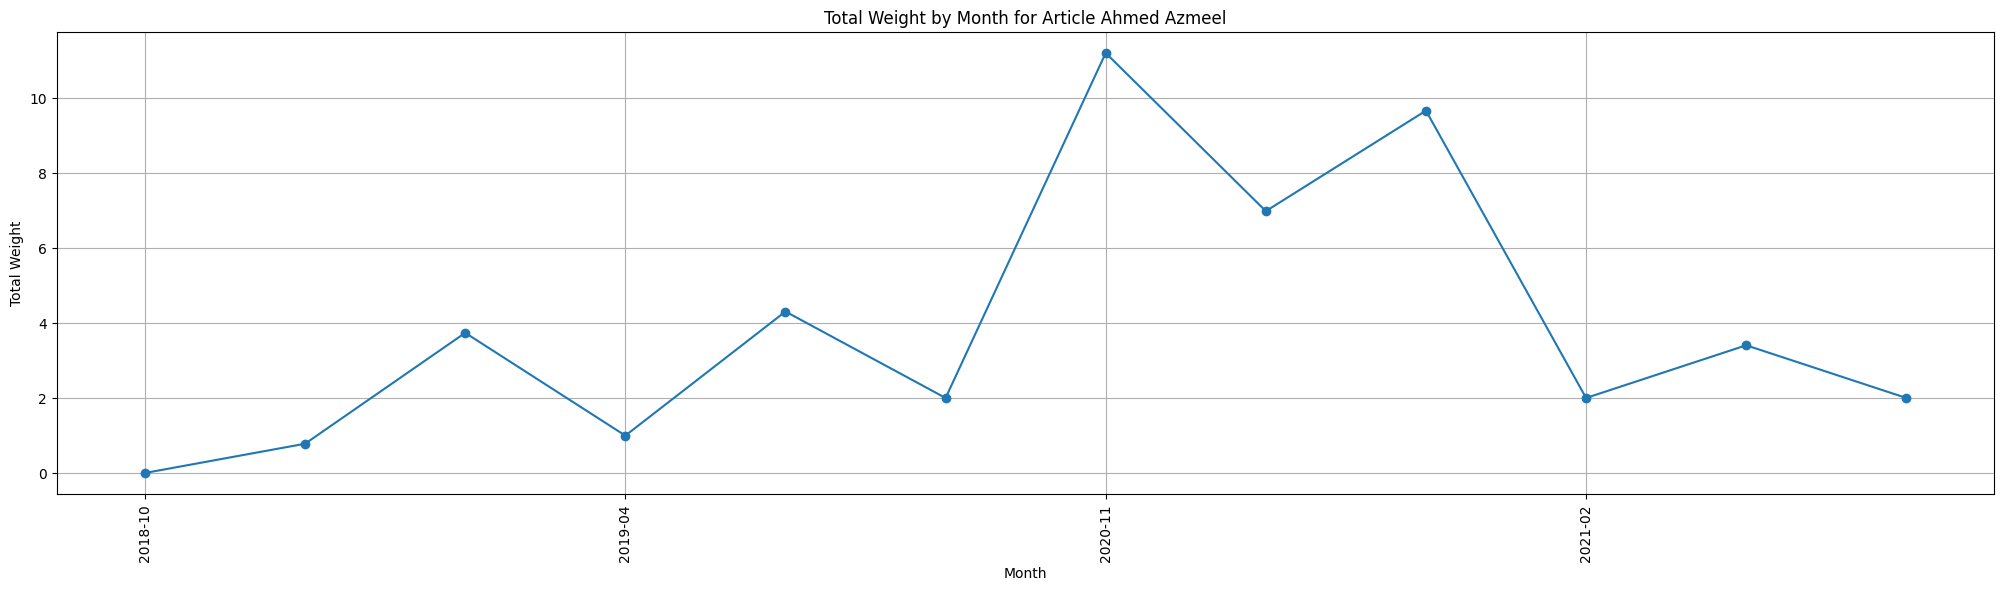

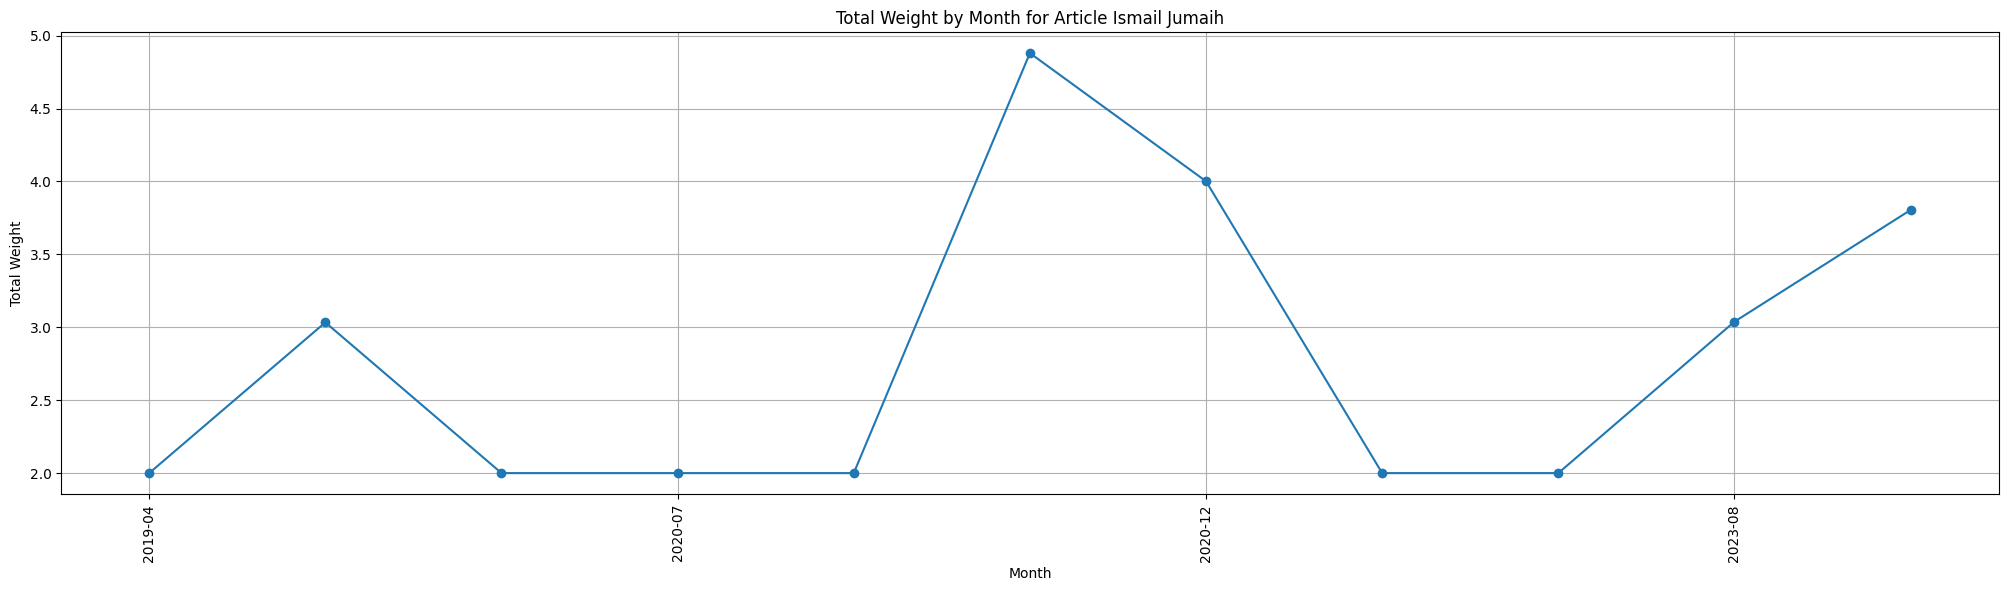

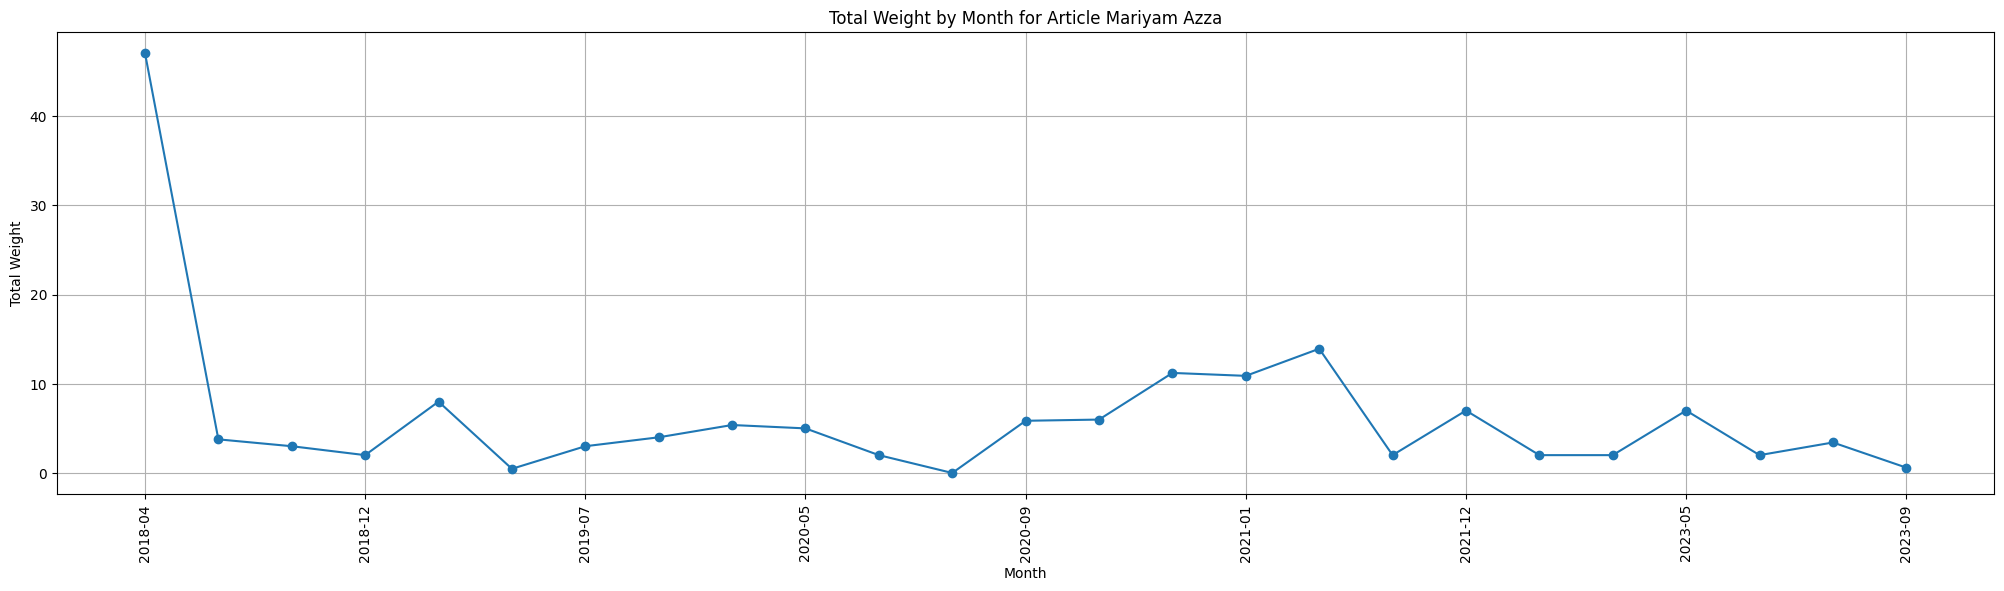

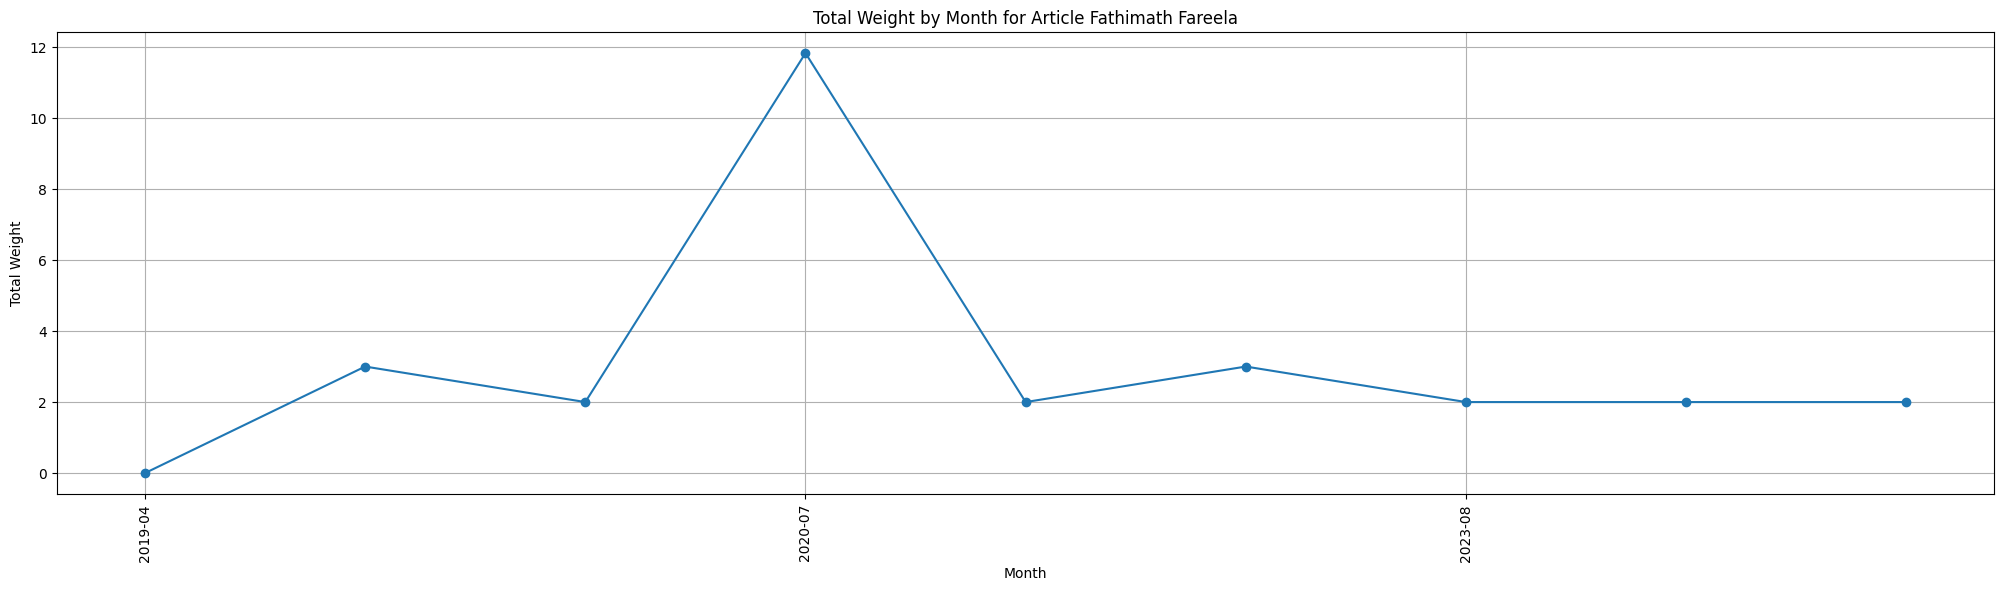

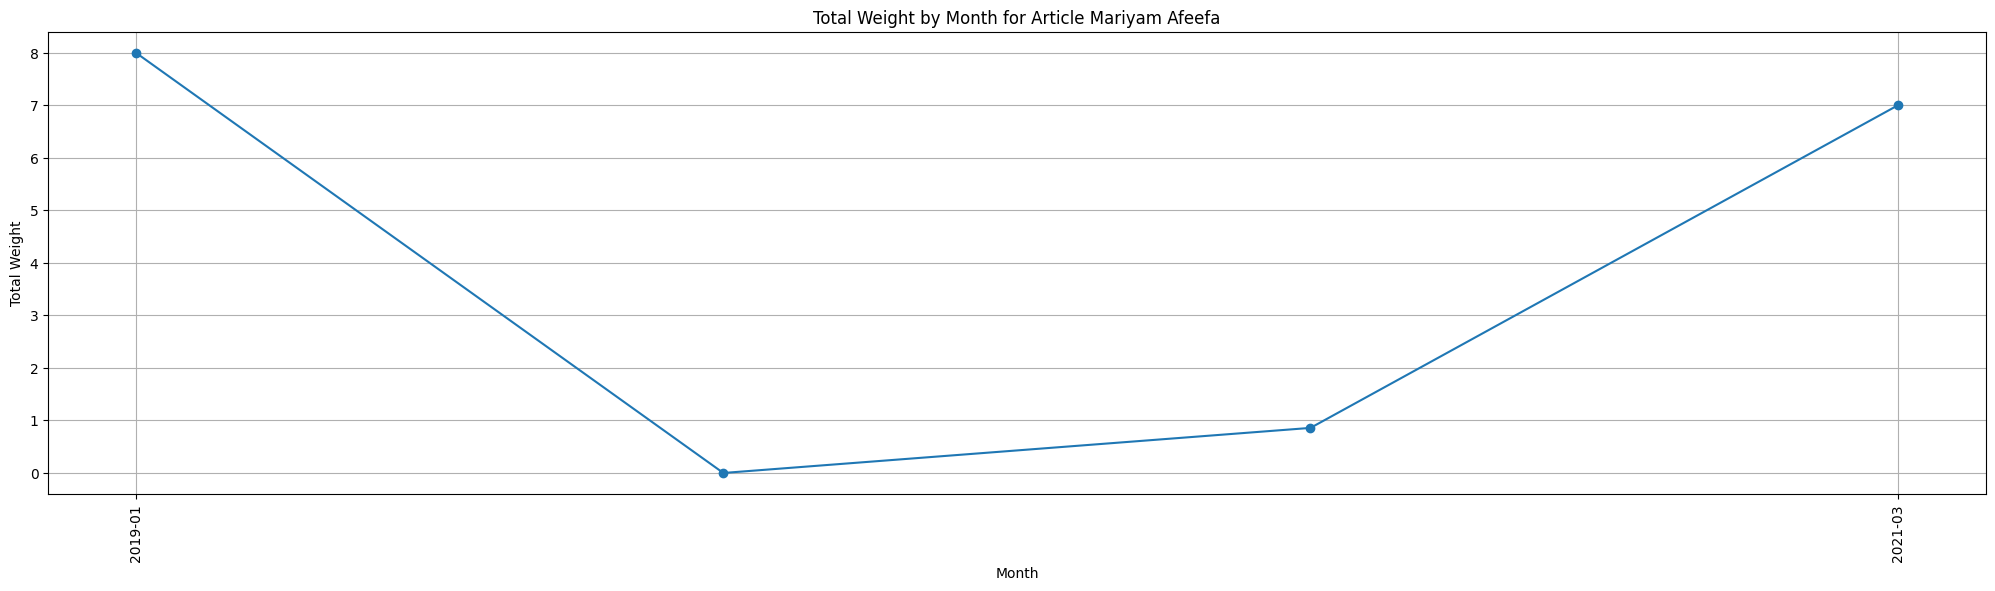

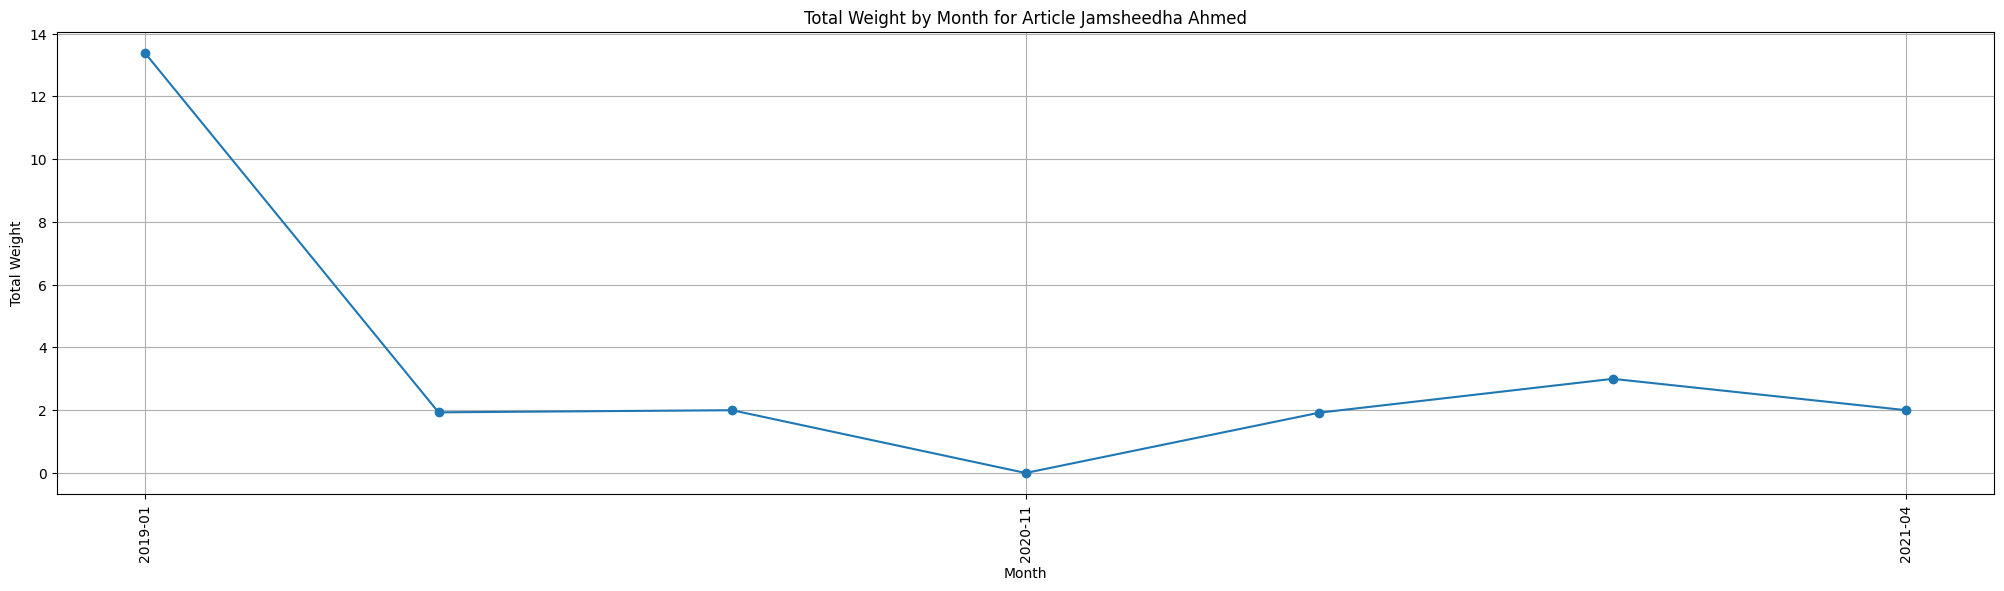

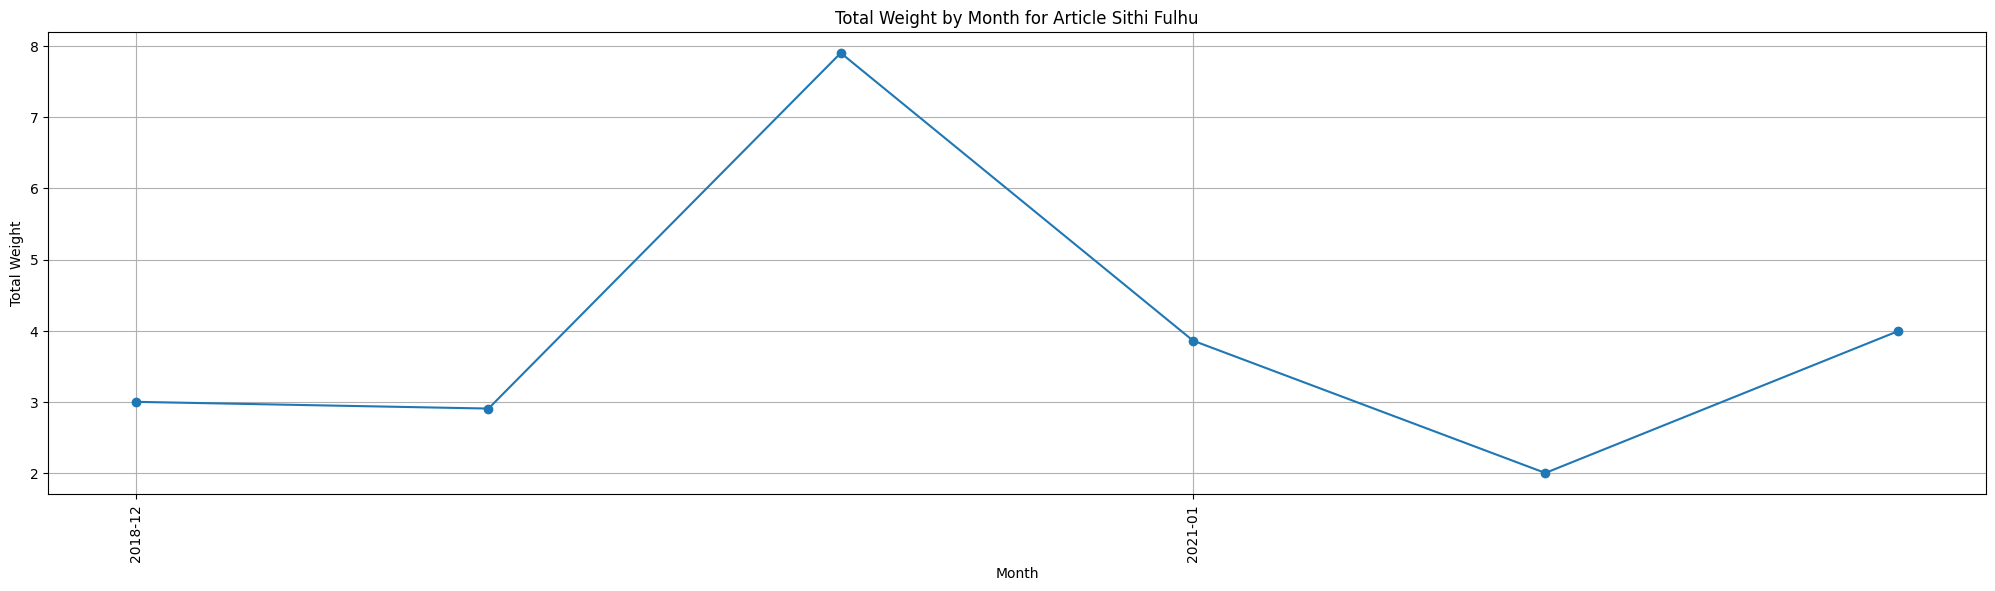

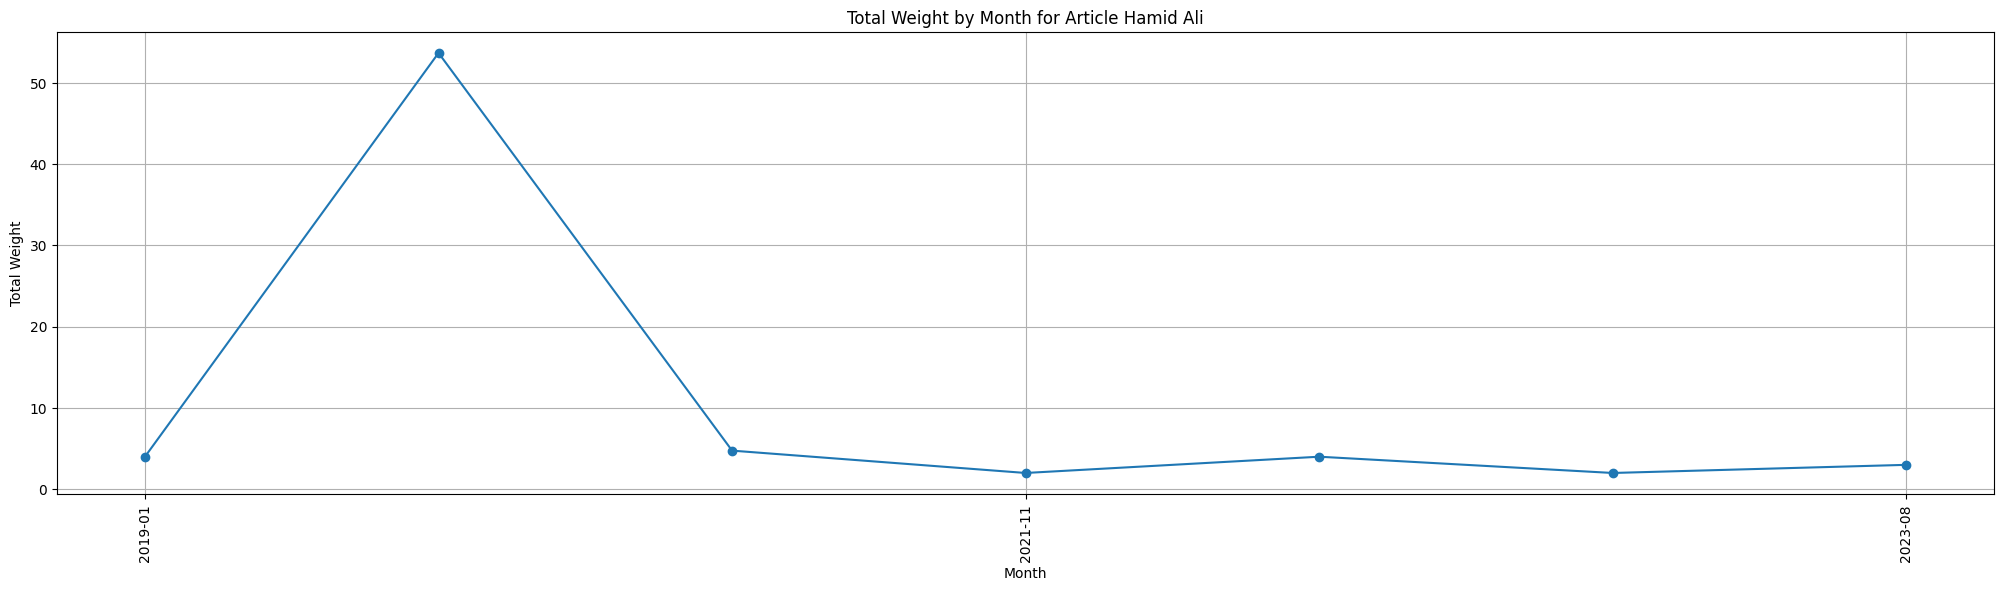

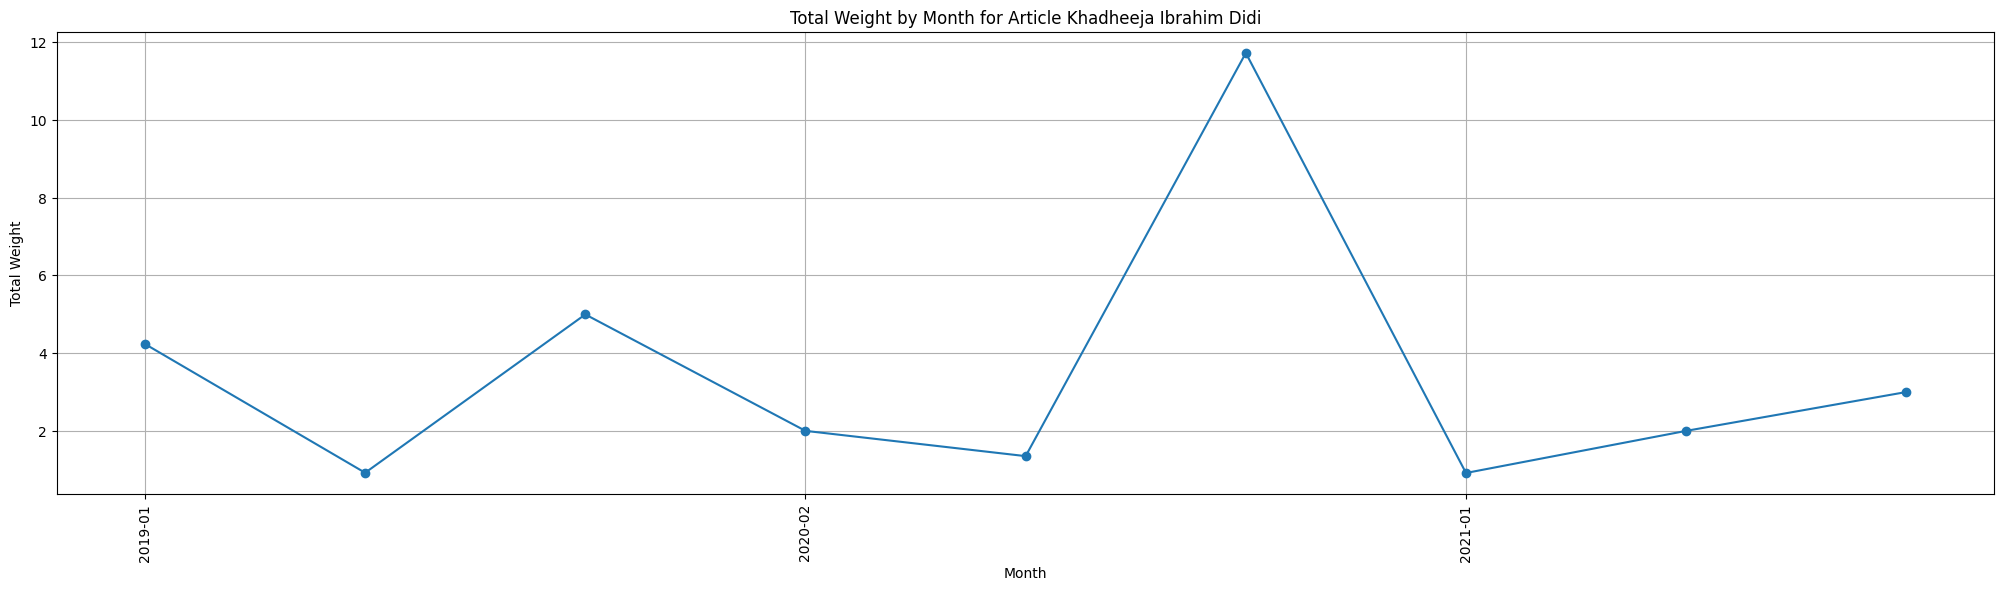

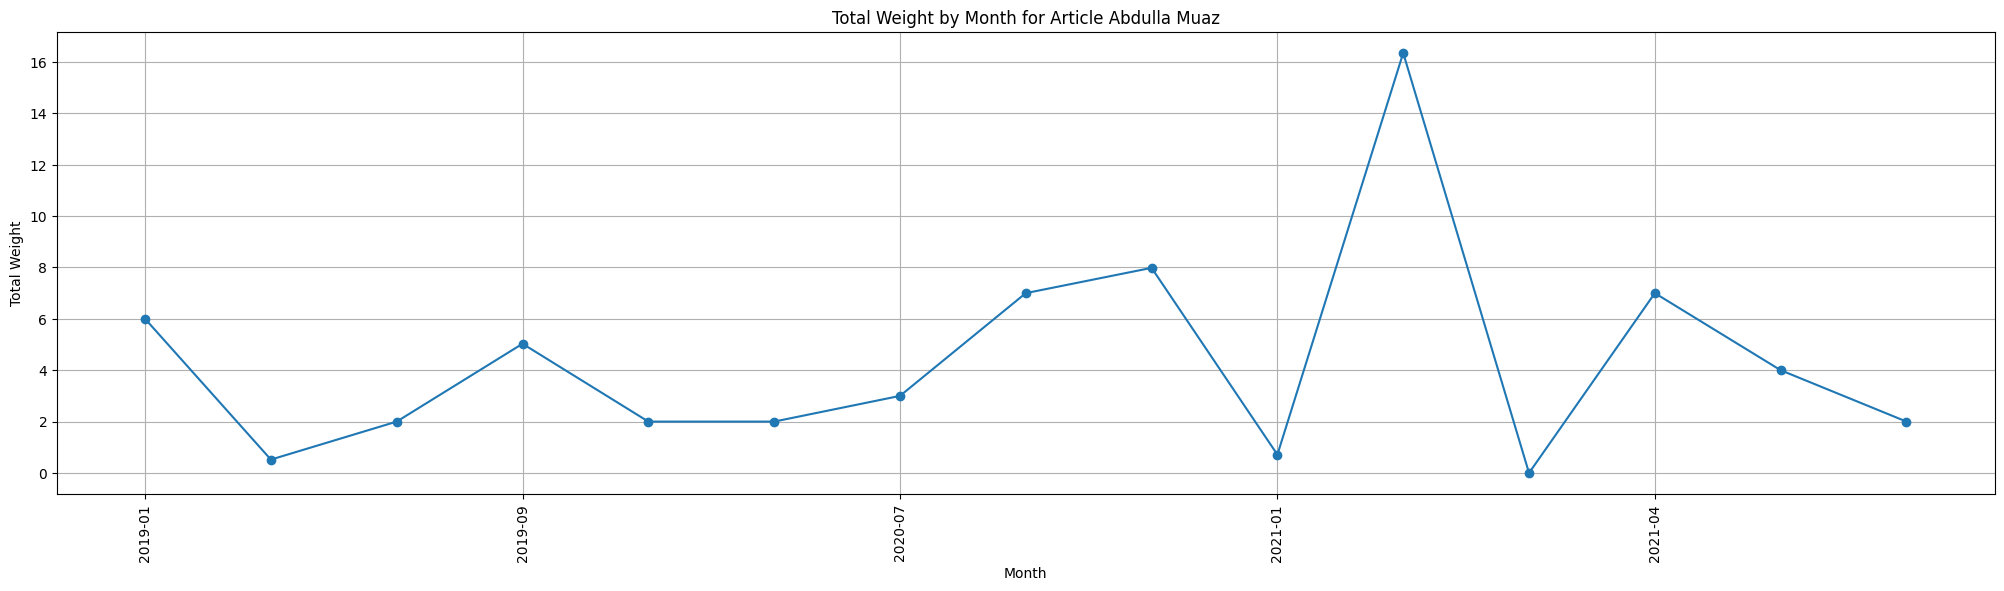

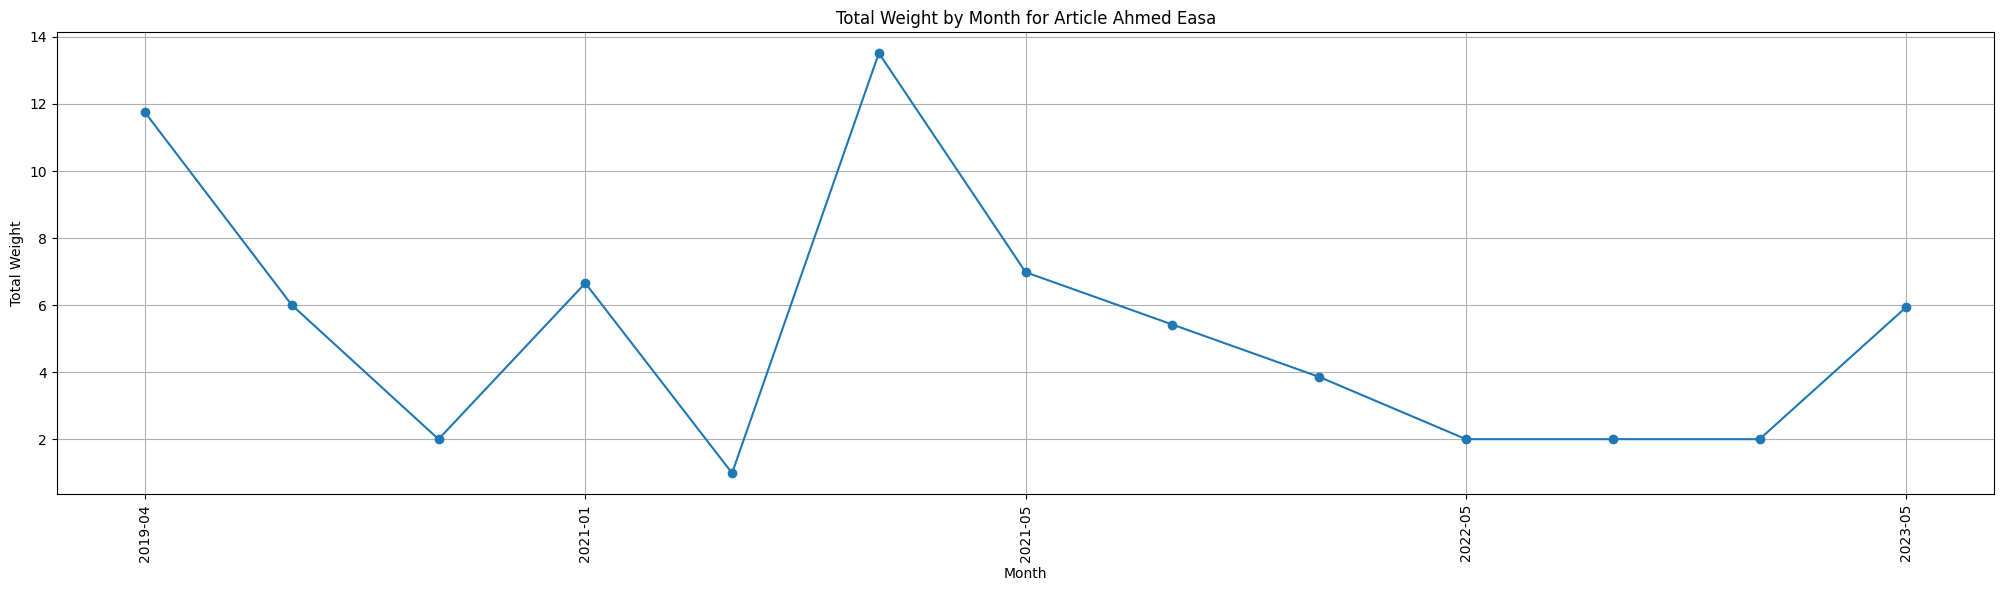

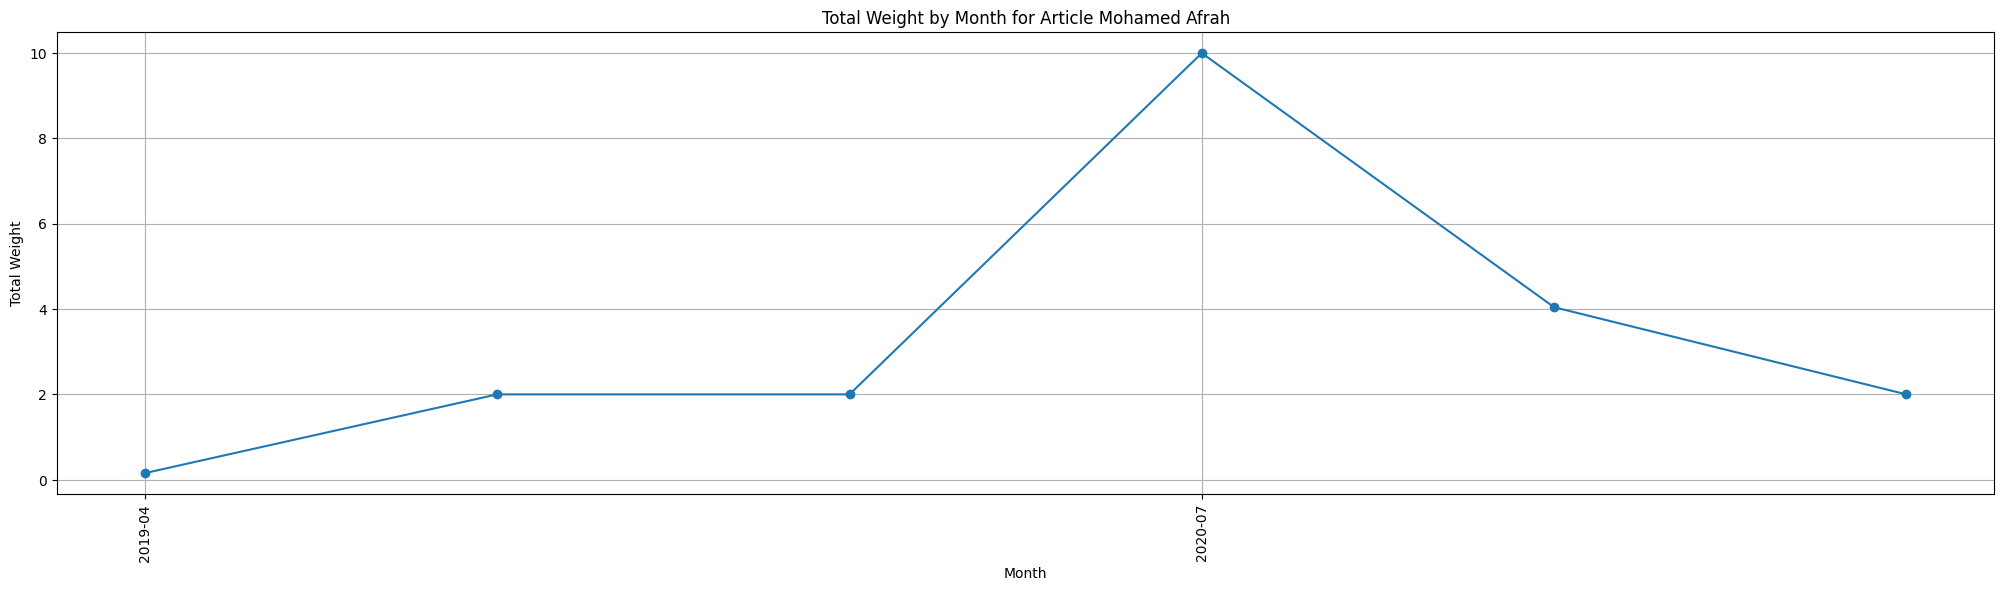

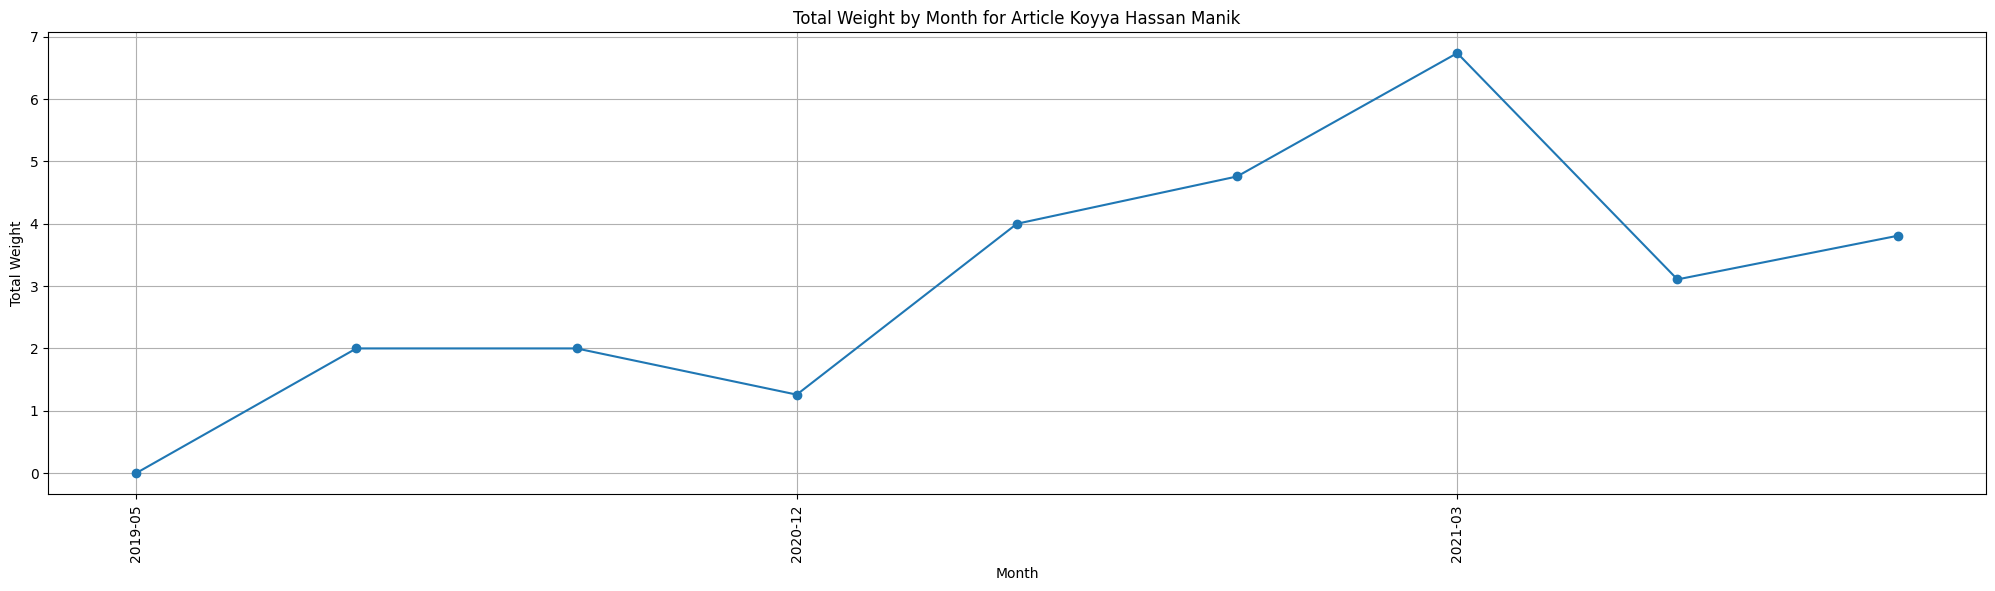

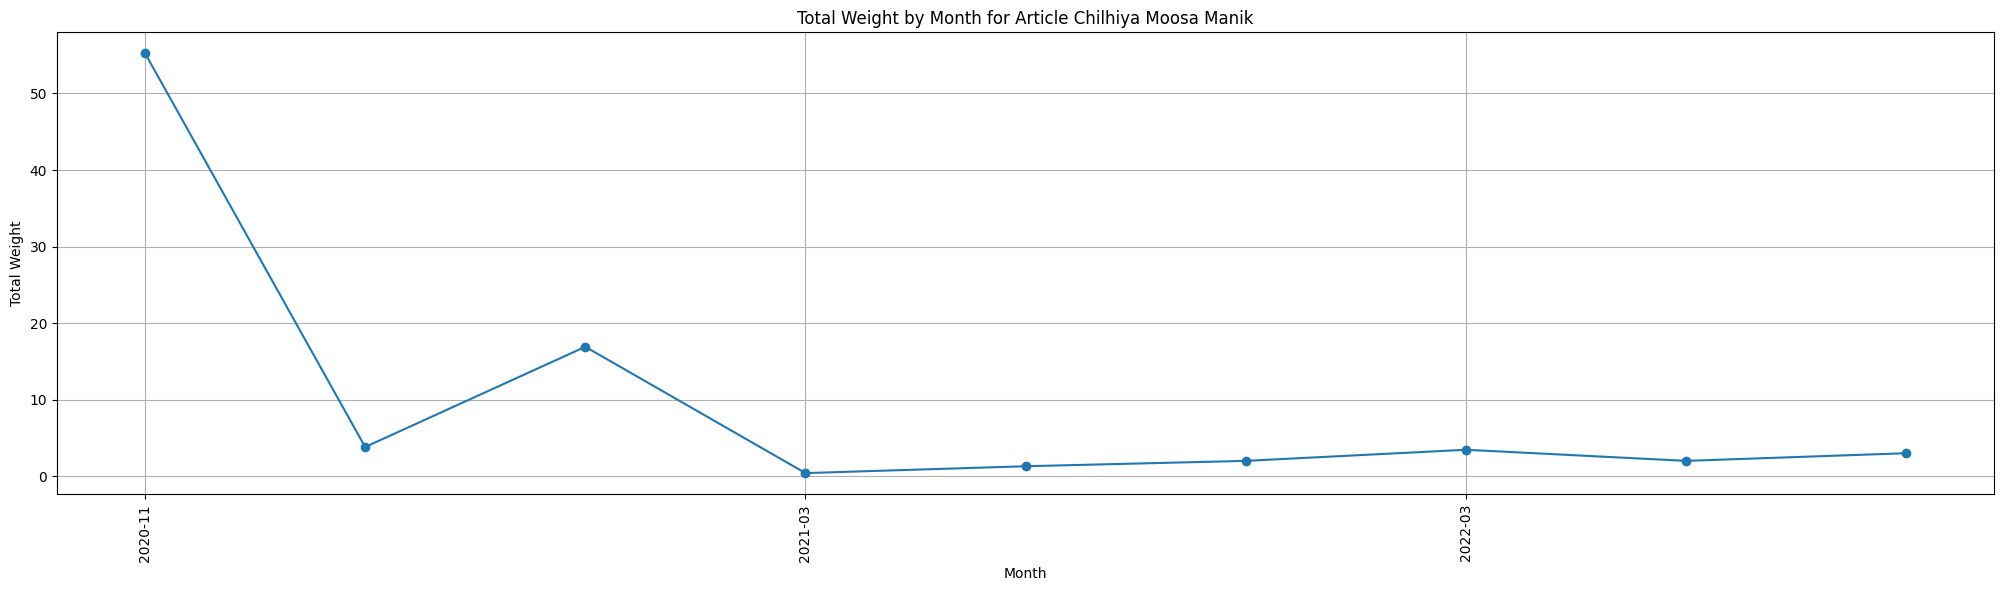

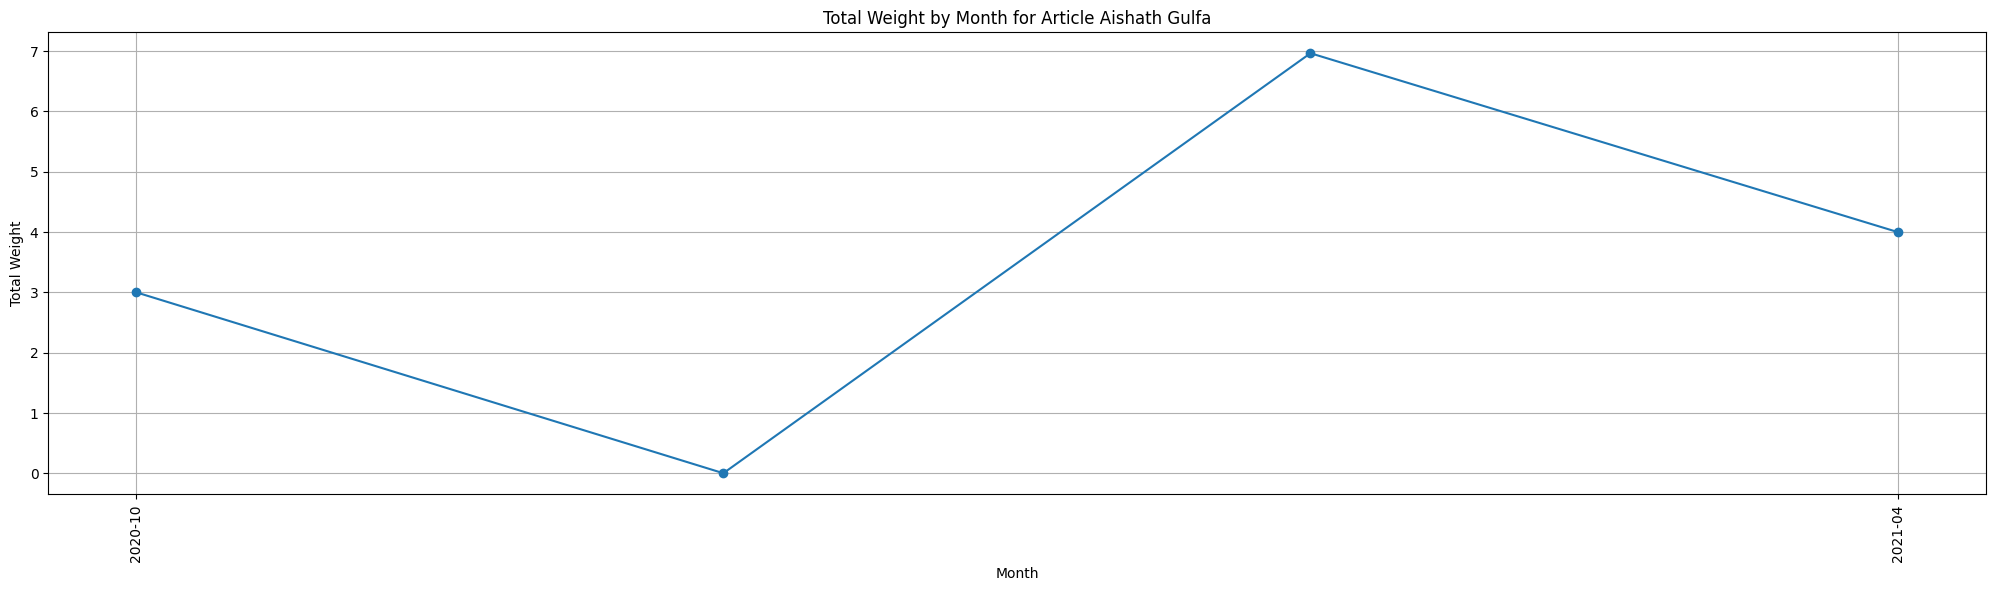

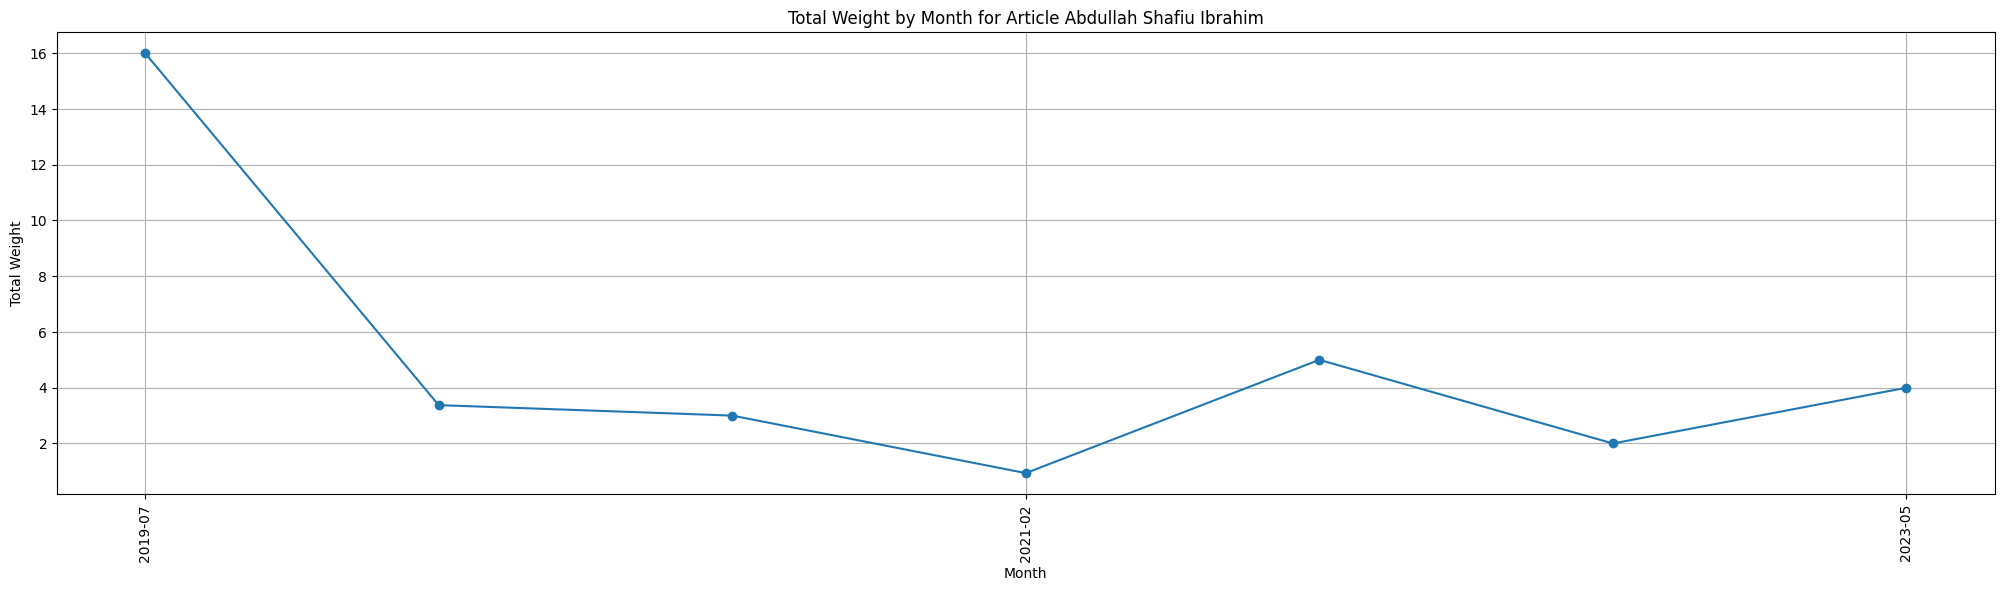

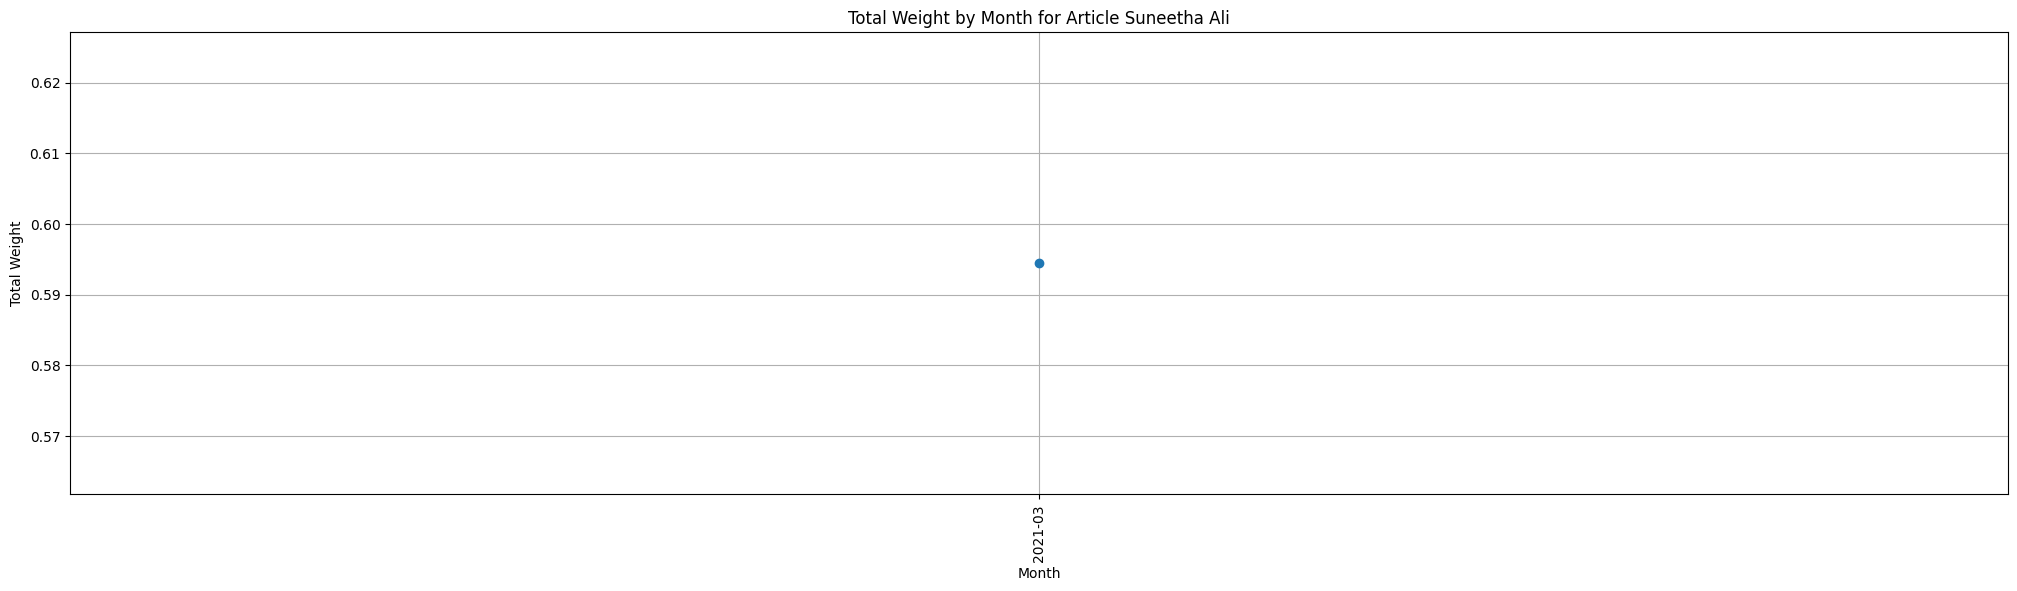

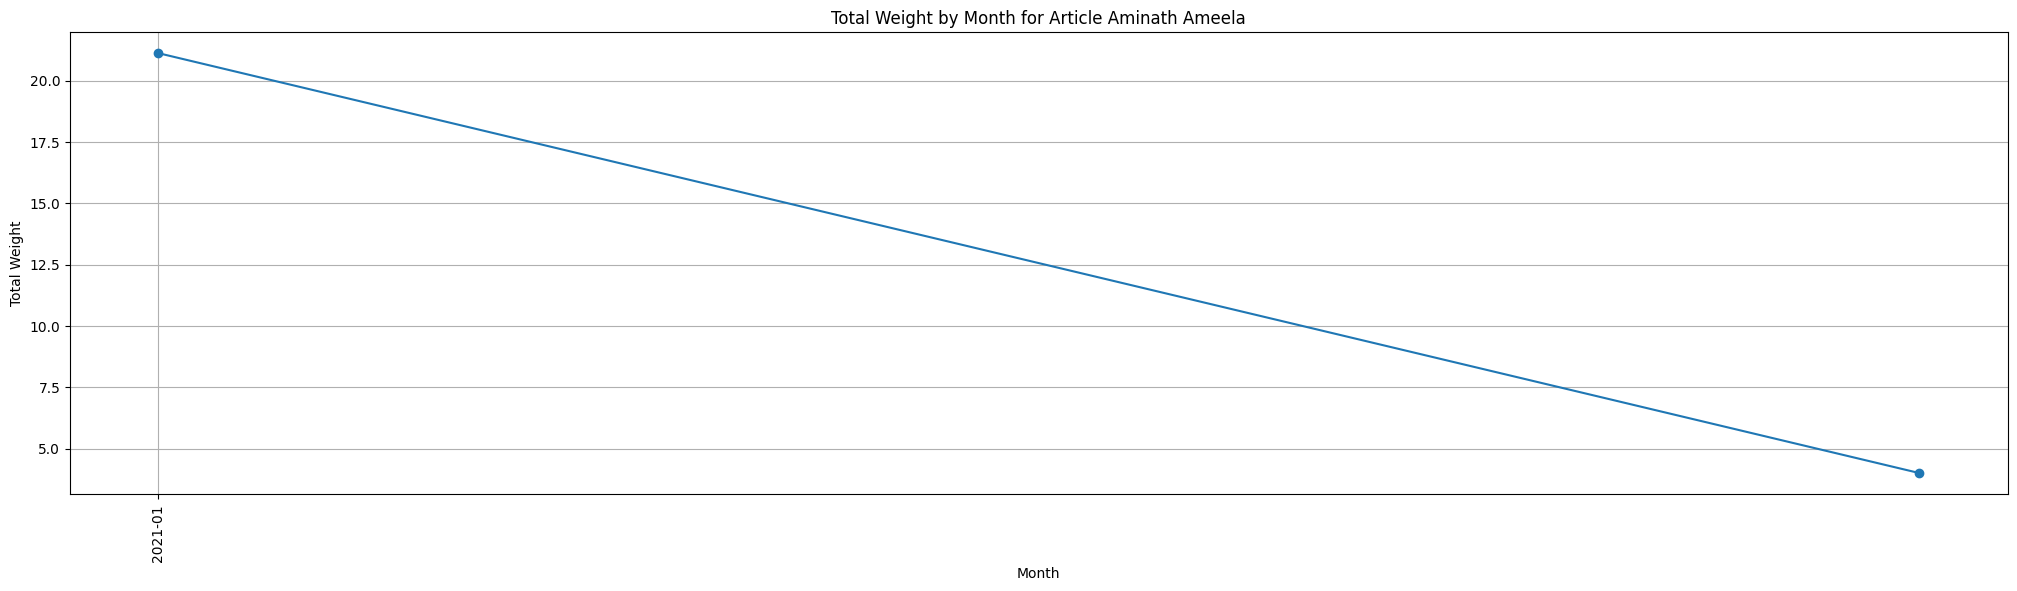

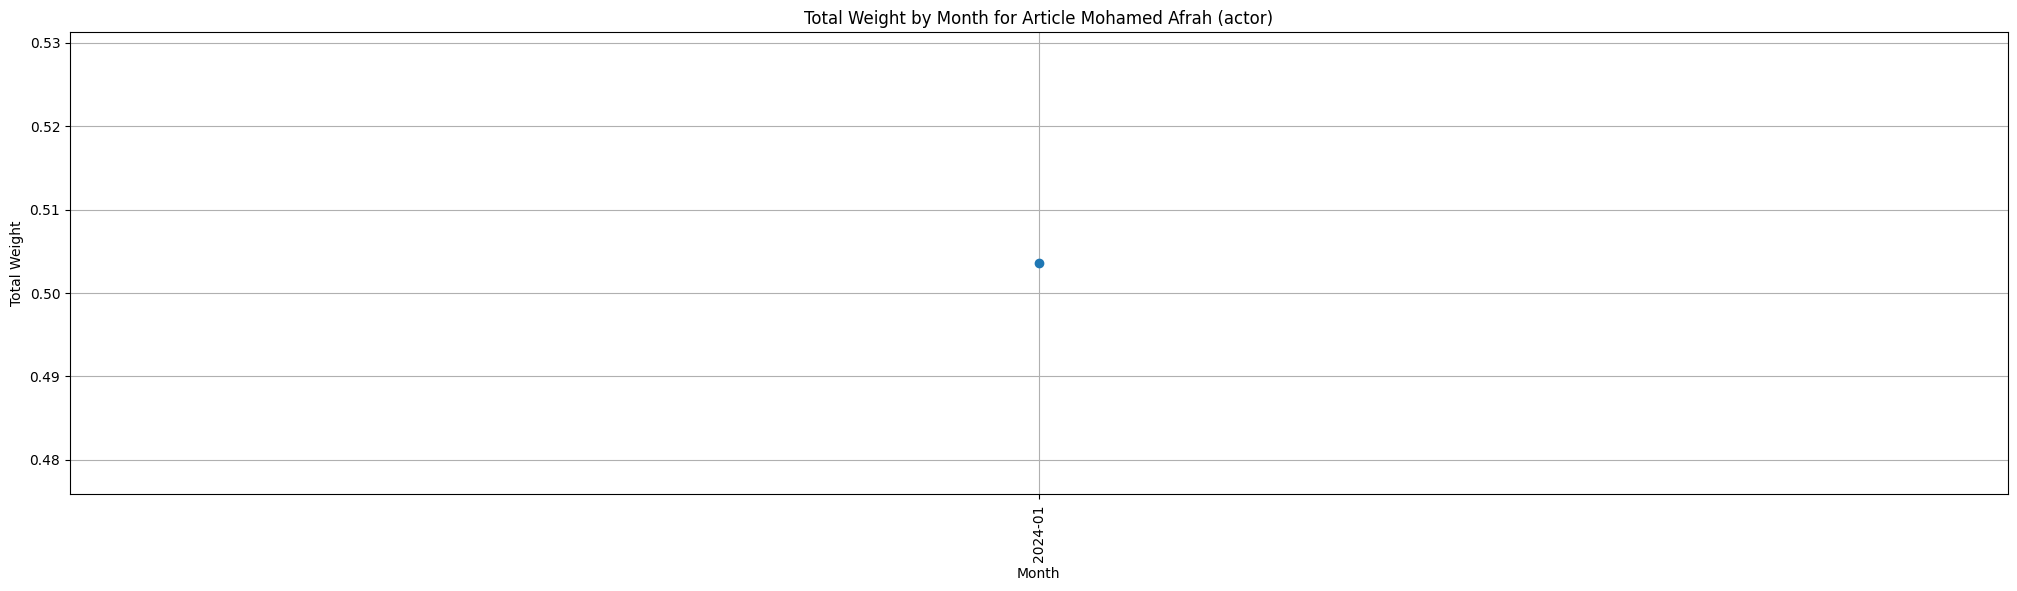

In [9]:
import matplotlib.pyplot as plt

# # Plot each article's total weight by month in a separate plot
# unique_articles = total_weights_by_month_df['Article Title'].unique()

for article_title in unique_articles:
    article_data = weights_df[weights_df['Article Title'] == article_title]
    plt.figure(figsize=(25, 6))
    plt.plot(article_data['Month'].astype(str), article_data['Weight'], marker='o', linestyle='-')
    plt.title(f'Total Weight by Month for Article {article_title}')
    plt.xlabel('Month')
    plt.ylabel('Total Weight')
    plt.xticks(rotation=90)
    plt.xticks(ticks=article_data['Month'].astype(str)[::3]) 
    plt.grid(True)
    plt.show()

